# Investigation into Automotive Industry in Maryland, United States of America

##### Creator: Benjamin Nicholson, Data Science Major at Seton Hill University

##### Supervisor: Dr Jared Burns, Professor of Data Science & Mathematics at Seton Hill University

# 1. Cars Sold Analysis

## 1.0 Data Preparation for Cars Sold Analysis

## 1.1 Totals Cars Sold Analysis

### 1.1.1 Identifying Overall Trends in Number of Cars Sold
### 1.1.2 Explore Growth of Number of Cars Sold
### 1.1.3 Identify Overall Trends in Value of Cars Sold
### 1.1.4 Explore Growth in Value of Cars Sold
### 1.1.5 Review of Cars Sold Analysis 


## 1.2 New Cars Sold Analysis

### 1.2.1 Overall trends in New Cars Sold
### 1.2.2 Explore Growth of Number of new Cars Sold
### 1.2.3 Identify Overall trends in value of new cars sold
### 1.2.4 Explore growth in value of new cars old
### 1.2.5 Conclusion of new cars sold

## 1.3 Used Cars Sold Analysis

### 1.3.1 Overall trends in Used Cars Sold
### 1.3.2 Explore Growth of Number of Used Cars Sold
### 1.3.3 Identify Overall trends in value of Used cars sold
### 1.3.4 Explore growth in value of Used cars old
### 1.3.5 Conclusion of new cars sold

<a id="cars-sold-analysis"></a>
# 1. Cars Sold Analysis
Understand the raw data that has been collected regarding Car Sales in Maryland from 2002-2023

<a id="data-preparation-cars-sold-analysis"></a>
## 1.0 Data Preparation for Cars Sold Analysis

In [1]:
#Import the neccessary packages for data analytics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
#Import Data for Chapter 1. Cars Sold Analysis 
#Maryland Vehicle Administration Vehicle (MVA) Data on Sales of New & Used Cars from Jan 2002 - Oct 2003
#url : https://catalog.data.gov/dataset/mva-vehicle-sales-counts-by-month-for-calendar-year-2002-2020-up-to-october
sales_data_month = pd.read_csv('MVA_Vehicle_Sales_Counts_by_Month_for_Calendar_Year_2002_through_October_2023.csv')

In [3]:
#Open the data file and view the data content, with the goal of Cars Sold Analysis in mind
#Look for columns that are going to helpful in understanding the Cars Sold in Maryland from 2002-2023
sales_data_month

,Year,Month,New,Used,Total Sales New,Total Sales Used
0,2002,JAN,31106,49927,755015820,386481929
1,2002,FEB,27520,50982,664454223,361353242
2,2002,MAR,34225,58794,805666244,419385387
3,2002,APR,36452,59817,846368297,433061150
4,2002,MAY,37359,60577,855005784,442569410
...,...,...,...,...,...,...
257,2023,JUN,27001,50613,1214340987,814275863
258,2023,JUL,26360,49502,1196918451,887723892
259,2023,AUG,25876,52725,1222581892,908454060
260,2023,SEP,23892,45386,1134437699,744676584


In [4]:
#There are 6 different variables
#The column names of the data are not very clear
#To improve the cohesiveness of the project, certain columns are going to be renamed
#Rename the following columns: 'New' as 'New Cars Sold', 'Used' as 'Used Cars Sold', 'Total Sales New' as 'Value of New Cars Sold', 'Total Sales Used' as 'Value of Used Cars Sold'
sales_data_month.rename(columns={'New':'New Cars Sold', 'Used':'Used Cars Sold', 'Total Sales New': 'Value of New Cars Sold', 'Total Sales Used':'Value of Used Cars Sold'}, inplace=True)
sales_data_month

,Year,Month,New Cars Sold,Used Cars Sold,Value of New Cars Sold,Value of Used Cars Sold
0,2002,JAN,31106,49927,755015820,386481929
1,2002,FEB,27520,50982,664454223,361353242
2,2002,MAR,34225,58794,805666244,419385387
3,2002,APR,36452,59817,846368297,433061150
4,2002,MAY,37359,60577,855005784,442569410
...,...,...,...,...,...,...
257,2023,JUN,27001,50613,1214340987,814275863
258,2023,JUL,26360,49502,1196918451,887723892
259,2023,AUG,25876,52725,1222581892,908454060
260,2023,SEP,23892,45386,1134437699,744676584


In [5]:
#As this data has 262 rows it is going to be difficult to identify any errors in the code
#Check to see if there are any null values in the data
#These need to be removed, especially in data science as they can skew results
sales_data_month.isnull().sum()

Year                       0
Month                      0
New Cars Sold              0
Used Cars Sold             0
Value of New Cars Sold     0
Value of Used Cars Sold    0
dtype: int64

In [6]:
#Another variable to check is if there are any duplicated values
#This could be the result of an error in the data collection process
#Duplicates need to be removed a they do not add any value to the dataset
sales_data_month.duplicated().sum()

0

<a id="number-of-cars-sold"></a>
## 1.1 Total Cars Sold in Maryland
Explore the overall trend of cars sold in Maryland. This will involve combining new and used cars sold in the state.

<a id="identifying-overall-trends-in-number-of-cars-sold"></a>
### 1.1.1 Identifying Overall Trends in Number of Cars Sold
Goals
1. Create a time series of monthly number of cars sold 
4. List highest & lowest cars sold in a month
3. Create a time series of yearly number of cars sold
4. List highest & lowest cars sold in a year
5. Analyse the impacts of global events on cars sold

#### 1.1.1.1 Create a time series of monthly number of cars sold

In [7]:
#When you have two numerical values such as Time and Cars Sold it is best to utilize a time series graph
#The goal is to create a time series of the Cars Sold in Maryland from 2002-2023
#When the original dataset sales_data_month is reviewed, the Cars Sold is split into New and Used Cars
sales_data_month

,Year,Month,New Cars Sold,Used Cars Sold,Value of New Cars Sold,Value of Used Cars Sold
0,2002,JAN,31106,49927,755015820,386481929
1,2002,FEB,27520,50982,664454223,361353242
2,2002,MAR,34225,58794,805666244,419385387
3,2002,APR,36452,59817,846368297,433061150
4,2002,MAY,37359,60577,855005784,442569410
...,...,...,...,...,...,...
257,2023,JUN,27001,50613,1214340987,814275863
258,2023,JUL,26360,49502,1196918451,887723892
259,2023,AUG,25876,52725,1222581892,908454060
260,2023,SEP,23892,45386,1134437699,744676584


In [8]:
#Create a new column, called 'Cars Sold' which combines 'New Cars Sold' column and 'Used Cars Sold' column
sales_data_month['Cars Sold'] = sales_data_month['New Cars Sold'] + sales_data_month['Used Cars Sold']
#View the new column
sales_data_month

,Year,Month,New Cars Sold,Used Cars Sold,Value of New Cars Sold,Value of Used Cars Sold,Cars Sold
0,2002,JAN,31106,49927,755015820,386481929,81033
1,2002,FEB,27520,50982,664454223,361353242,78502
2,2002,MAR,34225,58794,805666244,419385387,93019
3,2002,APR,36452,59817,846368297,433061150,96269
4,2002,MAY,37359,60577,855005784,442569410,97936
...,...,...,...,...,...,...,...
257,2023,JUN,27001,50613,1214340987,814275863,77614
258,2023,JUL,26360,49502,1196918451,887723892,75862
259,2023,AUG,25876,52725,1222581892,908454060,78601
260,2023,SEP,23892,45386,1134437699,744676584,69278


In [9]:
#Another issue that needs to be tackled before creating a time series graph is the format of the columns Year and Month
#The way the time series graph is setup, these columns cannot be used yet
#Create a column named 'Day' which starts at the beginning of every month (1.0)
#Creating a NumPy array where the size is the number of observations in the sales_data_month dataframe
Day = np.ones(sales_data_month.shape[0])

#Insert the column 'Day' to the right of 'Month' to improve logic of column order
sales_data_month.insert(2, 'Day', Day)
sales_data_month

,Year,Month,Day,New Cars Sold,Used Cars Sold,Value of New Cars Sold,Value of Used Cars Sold,Cars Sold
0,2002,JAN,1.0,31106,49927,755015820,386481929,81033
1,2002,FEB,1.0,27520,50982,664454223,361353242,78502
2,2002,MAR,1.0,34225,58794,805666244,419385387,93019
3,2002,APR,1.0,36452,59817,846368297,433061150,96269
4,2002,MAY,1.0,37359,60577,855005784,442569410,97936
...,...,...,...,...,...,...,...,...
257,2023,JUN,1.0,27001,50613,1214340987,814275863,77614
258,2023,JUL,1.0,26360,49502,1196918451,887723892,75862
259,2023,AUG,1.0,25876,52725,1222581892,908454060,78601
260,2023,SEP,1.0,23892,45386,1134437699,744676584,69278


In [10]:
#To reduce any column name errors
#This will get rid of any trailing white space from each column name in the dataframe
sales_data_month.columns = sales_data_month.columns.str.strip()
sales_data_month.columns

Index(['Year', 'Month', 'Day', 'New Cars Sold', 'Used Cars Sold',
       'Value of New Cars Sold', 'Value of Used Cars Sold', 'Cars Sold'],
      dtype='object')

In [11]:
#Column 'Day' has been added. 
#Convert column 'Month' into a numerical list.
#Map the months of year to a numerical value as January, February, ..., December to 1,2,...,12
#Uppercase the column 'Months' to reduce case sensitivity errors
numericalMonth = {'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, 'MAY':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9,
       'OCT':10, 'NOV':11, 'DEC':12}
sales_data_month['Month'] = sales_data_month['Month'].str.upper().map(numericalMonth)

In [12]:
# Create a new 'Date' column by combining columns 'Year', 'Month' and 'Day' 
#This new date column can be used as a timestamp for the time series graph
#Insert it at the beginning of the column order as it makes most sense to
date = pd.to_datetime(sales_data_month[['Year', 'Month', 'Day']])
sales_data_month.insert(0, 'Date', date)
sales_data_month

,Date,Year,Month,Day,New Cars Sold,Used Cars Sold,Value of New Cars Sold,Value of Used Cars Sold,Cars Sold
0,2002-01-01,2002,1,1.0,31106,49927,755015820,386481929,81033
1,2002-02-01,2002,2,1.0,27520,50982,664454223,361353242,78502
2,2002-03-01,2002,3,1.0,34225,58794,805666244,419385387,93019
3,2002-04-01,2002,4,1.0,36452,59817,846368297,433061150,96269
4,2002-05-01,2002,5,1.0,37359,60577,855005784,442569410,97936
...,...,...,...,...,...,...,...,...,...
257,2023-06-01,2023,6,1.0,27001,50613,1214340987,814275863,77614
258,2023-07-01,2023,7,1.0,26360,49502,1196918451,887723892,75862
259,2023-08-01,2023,8,1.0,25876,52725,1222581892,908454060,78601
260,2023-09-01,2023,9,1.0,23892,45386,1134437699,744676584,69278


In [13]:
#Drop columns 'Year', 'Month' and 'Day' as they are not neccessary anymore
sales_data_month.drop(columns={'Year','Month','Day'},inplace=True)
#View the updated dataframe
sales_data_month

,Date,New Cars Sold,Used Cars Sold,Value of New Cars Sold,Value of Used Cars Sold,Cars Sold
0,2002-01-01,31106,49927,755015820,386481929,81033
1,2002-02-01,27520,50982,664454223,361353242,78502
2,2002-03-01,34225,58794,805666244,419385387,93019
3,2002-04-01,36452,59817,846368297,433061150,96269
4,2002-05-01,37359,60577,855005784,442569410,97936
...,...,...,...,...,...,...
257,2023-06-01,27001,50613,1214340987,814275863,77614
258,2023-07-01,26360,49502,1196918451,887723892,75862
259,2023-08-01,25876,52725,1222581892,908454060,78601
260,2023-09-01,23892,45386,1134437699,744676584,69278


In [14]:
#Make 'Date' column the index
sales_data_month.index = pd.to_datetime(sales_data_month.index)
sales_data_month.set_index('Date', inplace=True)

In [15]:
#Create a function called 'Create_Time_Series' which can be done for simple Time Series Graphs
def time_series(xdata,ydata,title,xlabel,ylabel):
    plt.plot_date(xdata,ydata)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [16]:
#Create a function called 'time_series_line' which can be done for simple Time Series Graphs with a line connecting each point
def time_series_lines(xdata,ydata,title,xlabel,ylabel,marker_value):
    plt.plot(xdata,ydata,marker=marker_value)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

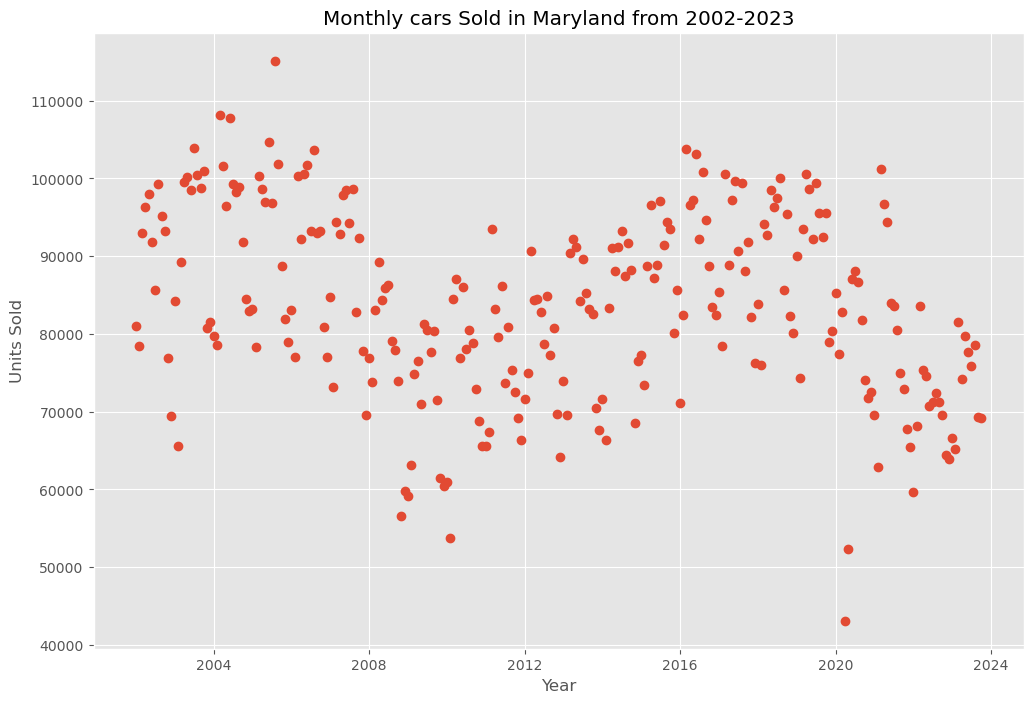

In [17]:
#Graph column Date compared to Cars Sold
#This will represent the total number of cars that have been sold on a monthly basis from Jan 2002-Oct 2023 in Maryland
monthly_cars_sold_ts = time_series(sales_data_month.index,sales_data_month['Cars Sold'], 'Monthly cars Sold in Maryland from 2002-2023', 'Year', 'Units Sold')

In [18]:
#Look at the mean and the standard deviation of this data
rolmean = sales_data_month['Cars Sold'].rolling(window=12).mean()
rolstd = sales_data_month['Cars Sold'].rolling(window=12).std()
print(rolmean,rolstd)

Date
2002-01-01             NaN
2002-02-01             NaN
2002-03-01             NaN
2002-04-01             NaN
2002-05-01             NaN
                  ...     
2023-06-01    71490.500000
2023-07-01    71871.000000
2023-08-01    72383.166667
2023-09-01    72219.750000
2023-10-01    72192.083333
Name: Cars Sold, Length: 262, dtype: float64 Date
2002-01-01            NaN
2002-02-01            NaN
2002-03-01            NaN
2002-04-01            NaN
2002-05-01            NaN
                 ...     
2023-06-01    5954.015429
2023-07-01    6084.915148
2023-08-01    6389.566664
2023-09-01    6446.314424
2023-10-01    6459.373027
Name: Cars Sold, Length: 262, dtype: float64


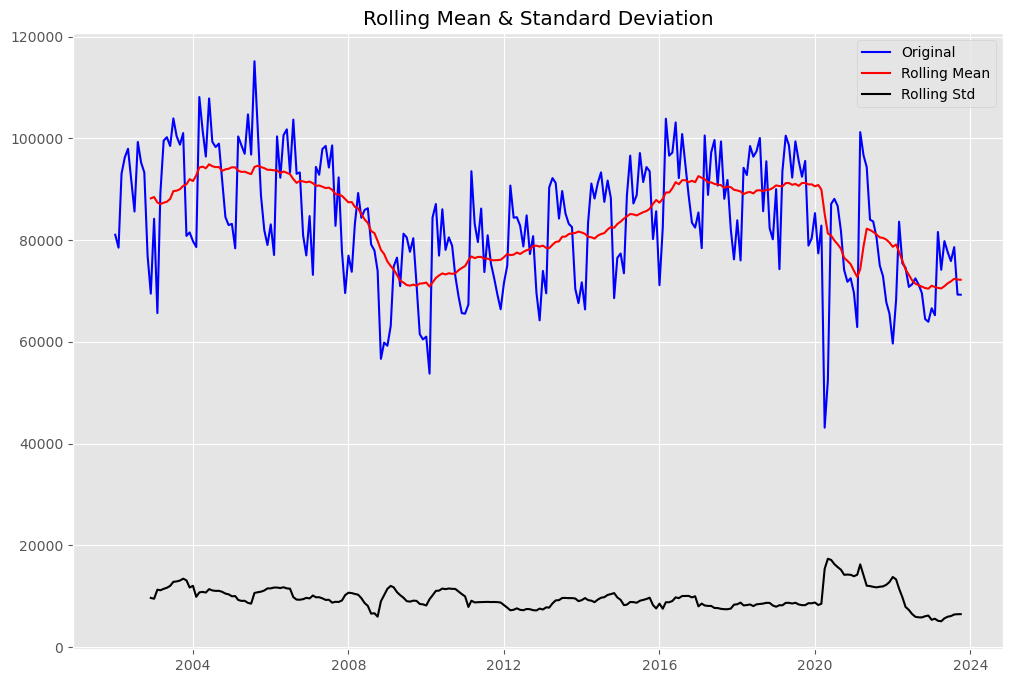

In [19]:
#Plot the rolling statistics
orig = plt.plot(sales_data_month['Cars Sold'],color='blue',label='Original')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#### 1.1.1.2 List the highest and lowest selling months

In [20]:
def print_top_and_bottom_n(df_column, n, text_top, text_bottom, include_month=False,percentage=False):
    """
    Prints the top and bottom n values of a DataFrame column along with custom text.

    Parameters:
    - df_column: pandas Series, the column of the DataFrame to analyze.
    - n: int, the number of top and bottom values to display.
    - text_top: str, the text to print before displaying the top values.
    - text_bottom: str, the text to print before displaying the bottom values.
    - include_month: bool, whether to include the month along with the year.
    """
    
    # Top n values
    print(text_top)
    for rank, (index, value) in enumerate(df_column.nlargest(n).iteritems(), start=1):
        if include_month:
            date_str = index.strftime("%B %Y")
        else:
            date_str = str(index.year-1)
        formatted_value = "{:,.2f}".format(value) + "%" if percentage else "{:,.2f}".format(value)
        print(f"{rank}. {date_str} - {formatted_value}")

    print()
    
    # Bottom n values
    print(text_bottom)
    for rank, (index, value) in enumerate(df_column.nsmallest(n).iteritems(), start=1):
        if include_month:
            date_str = index.strftime("%B %Y")
        else:
            date_str = str(index.year-1)
        formatted_value = "{:,.2f}".format(value) + "%" if percentage else "{:,.2f}".format(value)
        print(f"{rank}. {date_str} - {formatted_value}")


In [21]:
# Assuming sales_data_month is your DataFrame containing sales data
highest_lowest_cars_sold_month = print_top_and_bottom_n(sales_data_month['Cars Sold'], 5, "Highest Sales Month:", "Lowest Sales Month:", True)

Highest Sales Month:
1. August 2005 - 115,136.00
2. March 2004 - 108,106.00
3. June 2004 - 107,831.00
4. June 2005 - 104,695.00
5. July 2003 - 103,899.00

Lowest Sales Month:
1. April 2020 - 43,120.00
2. May 2020 - 52,407.00
3. February 2010 - 53,741.00
4. November 2008 - 56,645.00
5. January 2009 - 59,217.00


### Review of Monthly Cars Sold in Maryland from 2002-2023
The time series represents the combination of Used Cars Sold and New Cars Sold as a singular variable, Cars Sold. This creates a graph that encapsulates the need for cars in each month from 2002-2023. There is a clear decline in the average number of cars sold as well as some periods of major fluctuations. The major fluctuation periods are observed in the highest and lowest selling months. The lowest months took place in May and June of 2020, while the highest sales took place in April and July in 2004 only beaten by September in 2005.

Cars Sold seem to max out during 2003-2005 and steadily decrease to low around 2008-2009 likely due to the Global Financial Crises (2007-2008).

There is a recovery in years following, yet there is another drop in sales following 2020 which is likely due to Covid-19 (2020-2023).


##### Introduction to Economic Events

The analysis of car sales trends in Maryland from 2002 to 2024 reveals significant fluctuations, some of which coincide with major economic events. Two notable events are the Global Financial Crisis of 2007-2008 and the COVID-19 pandemic of 2020-2023. 

##### Global Financial Crisis (2007-2009)

The Global Financial Crisis, triggered by the collapse of the housing market in the United States, had widespread repercussions across the global economy. The crisis led to a sharp decline in consumer confidence, tightening credit markets, and a severe economic downturn in many countries. This downturn likely contributed to the drop in car sales observed in Maryland during the years surrounding the crisis (2007-2009).

##### COVID-19 Pandemic (2020-2023)

The COVID-19 pandemic, which originated in late 2019 and spread globally in 2020, resulted in unprecedented disruptions to economic activity, travel restrictions, and lockdown measures to contain the spread of the virus. These measures had significant impacts on consumer behavior, business operations, and supply chains, leading to a contraction in economic activity and a downturn in various sectors, including the automotive industry. The observed drop in car sales in Maryland following 2020 is likely attributable, at least in part, to the economic effects of the pandemic.


#### 1.1.1.3 Create a time series of yearly number of cars sold

In [22]:
#To create a yearly time series, convert the monthly sales into a yearly sales
#In order to do this, a new dataframe will be created, sales_data_year
#Iterate through each column and sum all the values up based on their year

# Create an empty DataFrame to store the yearly totals for each column
sales_data_year = pd.DataFrame(index=sales_data_month.index.year.unique())

# Iterate through each column of sales_data_month
for column in sales_data_month.columns:
    # Check if the column is numeric (assuming you want to calculate totals for numeric columns)
    if pd.api.types.is_numeric_dtype(sales_data_month[column]):
        # Calculate the yearly totals for the current column and store in yearly_totals_df
        sales_data_year[column] = sales_data_month.groupby(sales_data_month.index.year)[column].sum()

#This will convert the index of date to a timestamp which can be used in further analysis
sales_data_year.index = pd.to_datetime(sales_data_year.index, format='%Y')

sales_data_year

,New Cars Sold,Used Cars Sold,Value of New Cars Sold,Value of Used Cars Sold,Cars Sold
Date,,,,,
2002-01-01,402164,656089,9572554876,4940209772,1058253
2003-01-01,428252,675358,10623148339,5166071497,1103610
2004-01-01,428508,699677,10972956024,5385548947,1128185
2005-01-01,421834,703835,11006733922,5639803515,1125669
2006-01-01,399282,696968,10411657206,5865687318,1096250
2007-01-01,378184,678549,9997917483,5794213869,1056733
2008-01-01,309159,617885,7975401987,4896167840,927044
2009-01-01,248928,608889,6686217914,4510040527,857817
2010-01-01,268022,626045,7460915522,5054802303,894067


In [23]:
#The way that the dataframe is set out, the year is at the start instead of the end
#This should be made to be a year more so that for example 2002-01-01 represents the monthly sales of 2002
#We will add one year on from the date so 2002-01-01 will now read 2003-01-01 
#This will reflect all the months from 2002 January to 2002 December
#This logically makes more sense to have sales throughout the year to be at the start of the next year
sales_data_year.index = sales_data_year.index + pd.DateOffset(years=1)
#The year 2024-01-01 Also only has cars sold up until October of that year, so it would not be fair to include it in the data set
#Drop the observation 2024-01-01
sales_data_year.drop(index='2024-01-01', inplace=True)

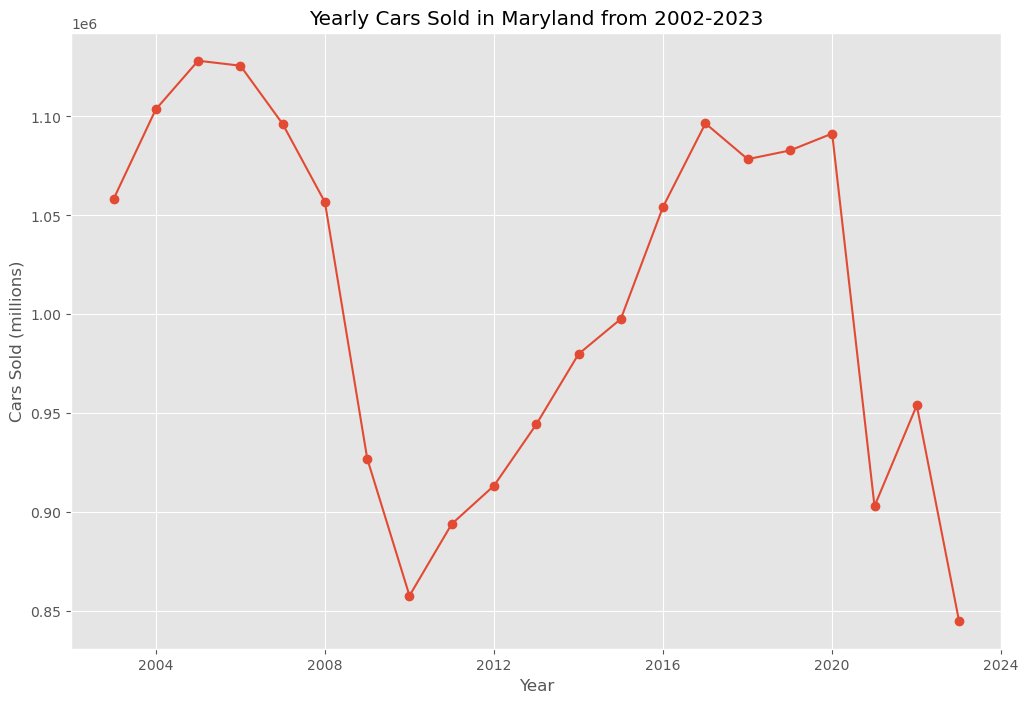

In [24]:
#The use of yearly sales data as a time series should make year-to-year patterns more clear
#Use a time series with lines connecting as there are only a small number of observations and you can visualise trends better
yearly_cars_sold_ts = time_series_lines(sales_data_year.index,sales_data_year['Cars Sold'], 'Yearly Cars Sold in Maryland from 2002-2023', 'Year', 'Cars Sold (millions)', 'o')

#### 1.1.1.4 Find the highest and lowest selling years

In [25]:
#Using the created function, input the four variables and get the result
print_top_and_bottom_n(sales_data_year['Cars Sold'], 3, 'Highest 3 Years for Cars Sold', 'Lowest 3 Years for Cars Sold')

Highest 3 Years for Cars Sold
1. 2004 - 1,128,185.00
2. 2005 - 1,125,669.00
3. 2003 - 1,103,610.00

Lowest 3 Years for Cars Sold
1. 2022 - 845,176.00
2. 2009 - 857,817.00
3. 2010 - 894,067.00


### Review of Yearly Cars Sold in Maryland from 2002-2023
The time series graph of yearly cars sold smooths the data so that major change in cars sold can be observed easier. Reducing the number of datapoints is going to reduce the impacts of outliers and finds the overall trend much better. The 3 highest years all took place during the 2003-2005 time period, the reason for this will be discussed in a later section. The lowest 3 years all took place following major global events. 2009 and 2010 were post global financial crises where as the lowest sales in 2022 is likely the result of the Covid-19 Pandemic.

#### 1.1.1.5 Analyse overall trends in number of cars sold

In [26]:
#Prior to reviewing the line time series that has been created it will be useful to gain some numerical information to add to the analysis
#Create a function that finds the percentage difference between two different points of a graph
#The following function is used for finding the percentage difference from one year to the next
def calculate_percentage_drop_between_years(dataframe, start_year, end_year):
    """
    Calculate the percentage drop in sales between two given years.

    Parameters:
    - dataframe: A pandas DataFrame containing car sales data indexed by year.
    - start_year: The starting year (e.g., '2006').
    - end_year: The ending year (e.g., '2009').

    Returns:
    - The percentage drop in sales between the start and end years.
    """
    # Extract car sales for the start and end years
    cars_sold_start = dataframe.loc[f'{int(start_year+1)}-01-01', 'Cars Sold'] #Add a year because the following year-01-01 represents the sales from the year before
    cars_sold_end = dataframe.loc[f'{int(end_year+1)}-01-01', 'Cars Sold'] #Add a year because the following year-01-01 represents the sales from the year before

    # Calculate the percentage difference
    percentage_drop = ((cars_sold_end - cars_sold_start) / cars_sold_end) * 100

    return print(f"Percentage difference between {start_year} and {end_year}: {percentage_drop:.2f}%")


In [27]:
#Find the percentage drop in sales from 2005-2009 
calculate_percentage_drop_between_years(sales_data_year,2006,2009)

Percentage difference between 2006 and 2009: -27.80%


In [28]:
#Find the percentage difference between 2019 and 2013
calculate_percentage_drop_between_years(sales_data_year,2019,2022)

Percentage difference between 2019 and 2022: -29.13%


In [29]:
#There is a clear increase in sales from 2009 to 2016 
#Find the percentage difference from 2009 to 2016
calculate_percentage_drop_between_years(sales_data_year,2009,2016)

Percentage difference between 2009 and 2016: 21.77%


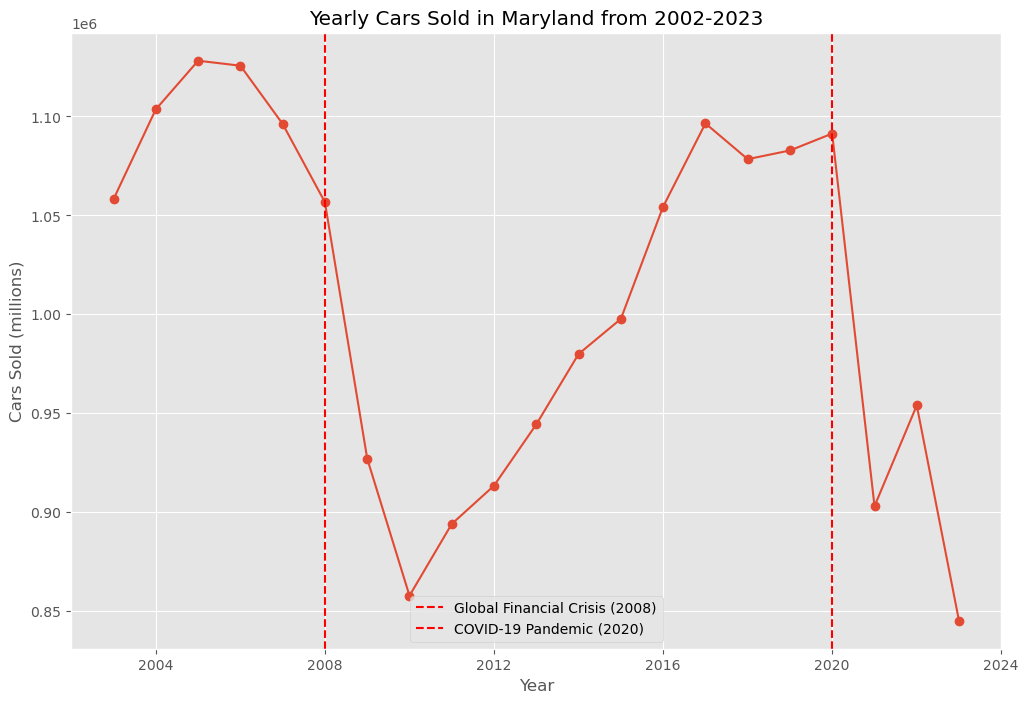

In [30]:
#The code above has been to gain a better understanding of how these global events impacted sales
#To further prove this, add in vertical lines representing when Covid-19 (2020) and the Global Financial Crisis (2008) took place
#This will represent how their events impacted the number of cars sold
years_of_importance = {'Global Financial Crisis':2008, 'COVID-19 Pandemic':2020}
yearly_cars_sold_with_vert = time_series_lines(sales_data_year.index,sales_data_year['Cars Sold'], 'Yearly Cars Sold in Maryland from 2002-2023', 'Year', 'Cars Sold (millions)', 'o')
for event, year in years_of_importance.items():
    plt.axvline(x=pd.to_datetime(str(year)), color='red', linestyle='--', label=f'{event} ({year})')
plt.legend()
#Remember to note that the datapoint 2020 represents the sales of 2019, hence why it is high

### Review of the Impacts of Global Financial Crises and Covid-19 on Car Sales
The Global Financial Crises (2008) and Covid-19 (2020) had detrimental impacts on the global economy. The car industry in Maryland experienced a similar effect. The vertical lines in 2008 and 2020 are included to better represent the change in cars sold following the large global events. The highest 3 years were in 2003, 2004 and 2005 which took place before the collapse of global markets due to the global financial crises. There was a 27.80% drop in cars sold from 2006 and 2009, which was similar to the 29.13% drop in car sold that took place from 2019 to 2022. There were many years of low sales following the Global Financial Crises in 2008, it took about 8 years for the number of cars sold to return to normal sale numbers. The Covid-19 Pandemic impact on Cars Sold in Maryland will likely continue for many years, this is where future projections can help determine the future sales, this will be discussed in chapter 4. The graph portrays the detrimental impact that global events has on the cylical change in cars sold.

### 1.1.2 Explore Growth of Number of Cars Sold
Goals:
1. Create a time series of monthly growth rates
2. Create a time series of yearly growth rates
3. List highest and lowest monthly growth rates
4. List highest and lowest yearly growth rates
5. analyse overall trend in number of cars sold

#### 1.1.2.1 Create a time series of monthly growth rates

In [31]:
#Review the current dataframe 
sales_data_month

,New Cars Sold,Used Cars Sold,Value of New Cars Sold,Value of Used Cars Sold,Cars Sold
Date,,,,,
2002-01-01,31106,49927,755015820,386481929,81033
2002-02-01,27520,50982,664454223,361353242,78502
2002-03-01,34225,58794,805666244,419385387,93019
2002-04-01,36452,59817,846368297,433061150,96269
2002-05-01,37359,60577,855005784,442569410,97936
...,...,...,...,...,...
2023-06-01,27001,50613,1214340987,814275863,77614
2023-07-01,26360,49502,1196918451,887723892,75862
2023-08-01,25876,52725,1222581892,908454060,78601


In [32]:
#Create a new column called 'Monthly Change in Total Sales'
#This is going to get the Cars Sold sold last month and find the difference to the current month
sales_data_month['Monthly Change in Cars Sold'] = sales_data_month['Cars Sold'].diff()
sales_data_month

,New Cars Sold,Used Cars Sold,Value of New Cars Sold,Value of Used Cars Sold,Cars Sold,Monthly Change in Cars Sold
Date,,,,,,
2002-01-01,31106,49927,755015820,386481929,81033,NaN
2002-02-01,27520,50982,664454223,361353242,78502,-2531.0
2002-03-01,34225,58794,805666244,419385387,93019,14517.0
2002-04-01,36452,59817,846368297,433061150,96269,3250.0
2002-05-01,37359,60577,855005784,442569410,97936,1667.0
...,...,...,...,...,...,...
2023-06-01,27001,50613,1214340987,814275863,77614,-2174.0
2023-07-01,26360,49502,1196918451,887723892,75862,-1752.0
2023-08-01,25876,52725,1222581892,908454060,78601,2739.0


In [33]:
#Now we can make this a percentage difference 
#The percentage difference is useful when looking at relative changes compared to other factors
sales_data_month['Monthly Change in Cars Sold (%)'] = sales_data_month['Cars Sold'].pct_change() * 100
sales_data_month

,New Cars Sold,Used Cars Sold,Value of New Cars Sold,Value of Used Cars Sold,Cars Sold,Monthly Change in Cars Sold,Monthly Change in Cars Sold (%)
Date,,,,,,,
2002-01-01,31106,49927,755015820,386481929,81033,NaN,NaN
2002-02-01,27520,50982,664454223,361353242,78502,-2531.0,-3.123419
2002-03-01,34225,58794,805666244,419385387,93019,14517.0,18.492522
2002-04-01,36452,59817,846368297,433061150,96269,3250.0,3.493910
2002-05-01,37359,60577,855005784,442569410,97936,1667.0,1.731606
...,...,...,...,...,...,...,...
2023-06-01,27001,50613,1214340987,814275863,77614,-2174.0,-2.724721
2023-07-01,26360,49502,1196918451,887723892,75862,-1752.0,-2.257325
2023-08-01,25876,52725,1222581892,908454060,78601,2739.0,3.610503


In [34]:
#The way that the dataframe is set out, the month is at the start instead of the end.
#Change the dataframe so that so that an additional month value is added to each date, for example 2002-01-01 is actually the month of January in 2002
#We will add one month to the date so 2002-01-01 will now read 2002-02-01 
#This will reflect all the months from 2002 January to 2002 December
sales_data_month.index = sales_data_month.index + pd.DateOffset(months=1)
sales_data_month

,New Cars Sold,Used Cars Sold,Value of New Cars Sold,Value of Used Cars Sold,Cars Sold,Monthly Change in Cars Sold,Monthly Change in Cars Sold (%)
Date,,,,,,,
2002-02-01,31106,49927,755015820,386481929,81033,NaN,NaN
2002-03-01,27520,50982,664454223,361353242,78502,-2531.0,-3.123419
2002-04-01,34225,58794,805666244,419385387,93019,14517.0,18.492522
2002-05-01,36452,59817,846368297,433061150,96269,3250.0,3.493910
2002-06-01,37359,60577,855005784,442569410,97936,1667.0,1.731606
...,...,...,...,...,...,...,...
2023-07-01,27001,50613,1214340987,814275863,77614,-2174.0,-2.724721
2023-08-01,26360,49502,1196918451,887723892,75862,-1752.0,-2.257325
2023-09-01,25876,52725,1222581892,908454060,78601,2739.0,3.610503


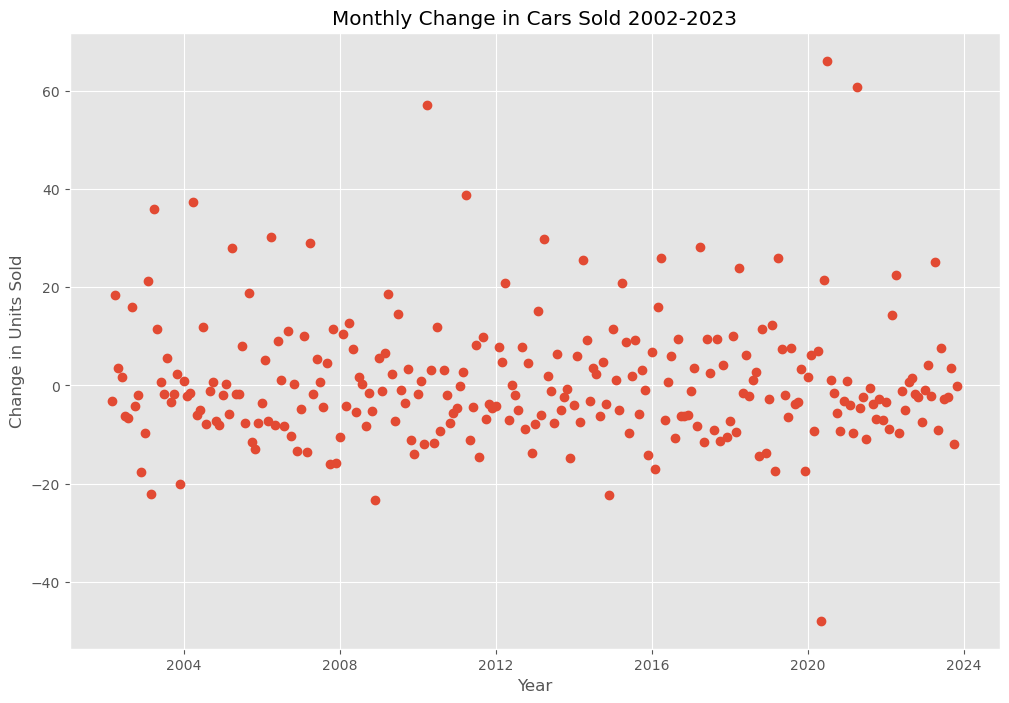

In [35]:
#Graph the 'Monthly Change in Cars Sold' as this will give a good representation of how sales change within a year
#In the next section this data can be used to slice time periods to understand seasonality better
#The use of units sold comparison instead of percentage difference is to gain a greater undersanding of overall change in the market
monthly_change_cars_sold_pct_ts = time_series(sales_data_month.index, sales_data_month['Monthly Change in Cars Sold (%)'],'Monthly Change in Cars Sold 2002-2023', 'Year', 'Change in Units Sold')

##### Review of Monthly Change in Cars Sold in Maryland from 2002-2023

This graph is meant to highlight certain periods of significant growth. Linear growth in cars sold would assume this graph to show some increase in values above 0. However the graph represents decay as there seems to be far more data points below 0, especially in recent years. Outliers are can be easily observed, some months in 2010 and 2020 suggest volitaile market conditions leading to large increases in units of cars sold. For there to be around a 35,000 increase in units sold from one month to the next this must be due to some external factor that is not the result in time. The lack of pattern suggests that the reason for changes in units of cars being sold is not the result of time.

#### 1.1.2.2 Create a time series of yearly growth rates

In [36]:
#Create a new column called 'Yearly Change in Total Sales'
#Using the .diff() function is going to find the difference in units sold from year to year.
sales_data_year['Yearly Change in Cars Sold'] = sales_data_year['Cars Sold'].diff()
sales_data_year

,New Cars Sold,Used Cars Sold,Value of New Cars Sold,Value of Used Cars Sold,Cars Sold,Yearly Change in Cars Sold
Date,,,,,,
2003-01-01,402164,656089,9572554876,4940209772,1058253,NaN
2004-01-01,428252,675358,10623148339,5166071497,1103610,45357.0
2005-01-01,428508,699677,10972956024,5385548947,1128185,24575.0
2006-01-01,421834,703835,11006733922,5639803515,1125669,-2516.0
2007-01-01,399282,696968,10411657206,5865687318,1096250,-29419.0
2008-01-01,378184,678549,9997917483,5794213869,1056733,-39517.0
2009-01-01,309159,617885,7975401987,4896167840,927044,-129689.0
2010-01-01,248928,608889,6686217914,4510040527,857817,-69227.0
2011-01-01,268022,626045,7460915522,5054802303,894067,36250.0


In [37]:
#Create a new column called 'Percentage Difference Yearly'
#This is going to get the Cars Sold sold last year compared to current year and make that a percentage difference
#2003-01-01 represents the percentage change from 2002-01-01 to 2003-01-01 which is the calendar year of 2002.
#So the 2008 and 2020 points on the graph represent the change in that calendar year
sales_data_year['Yearly Change in Cars Sold (%)'] = sales_data_year['Cars Sold'].pct_change() * 100
sales_data_year

,New Cars Sold,Used Cars Sold,Value of New Cars Sold,Value of Used Cars Sold,Cars Sold,Yearly Change in Cars Sold,Yearly Change in Cars Sold (%)
Date,,,,,,,
2003-01-01,402164,656089,9572554876,4940209772,1058253,NaN,NaN
2004-01-01,428252,675358,10623148339,5166071497,1103610,45357.0,4.286026
2005-01-01,428508,699677,10972956024,5385548947,1128185,24575.0,2.226783
2006-01-01,421834,703835,11006733922,5639803515,1125669,-2516.0,-0.223013
2007-01-01,399282,696968,10411657206,5865687318,1096250,-29419.0,-2.613468
2008-01-01,378184,678549,9997917483,5794213869,1056733,-39517.0,-3.604743
2009-01-01,309159,617885,7975401987,4896167840,927044,-129689.0,-12.272637
2010-01-01,248928,608889,6686217914,4510040527,857817,-69227.0,-7.467499
2011-01-01,268022,626045,7460915522,5054802303,894067,36250.0,4.225843


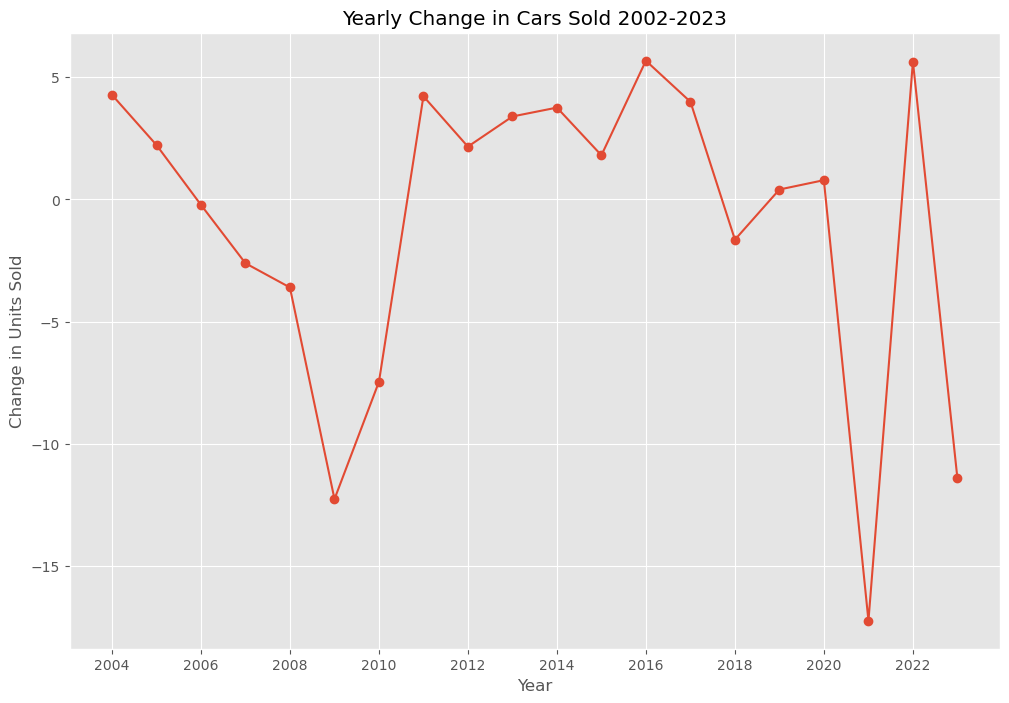

In [38]:
#Graph the 'Monthly Change in Total Sales' as this will give a good representation of how sales change within a year
yearly_change_cars_sold_pct_ts = time_series_lines(sales_data_year.index, sales_data_year['Yearly Change in Cars Sold (%)'],'Yearly Change in Cars Sold 2002-2023', 'Year', 'Change in Units Sold', 'o')

##### Review of Yearly Change in Cars Sold 2002-2023
While there is no clear overall pattern, there are some important factors that are observed in this data. You can see that the calendar year 2008 and 2020 (reflected as 2009 and 2021) on the graph had the biggest reduction in Cars Sold sold in Maryland. The change takes place from the first day of 2008 and the first day of 2009 so we can conclude that the biggest drops in numbers of cars sold took place in the years 2008 and 2020. The drop in 2020 is larger than 2008 likely due to the sudden financial burden that occured during the COVID-19 Pandemic rather than the slow decline of financial markets from the years leading up to 2008.

#### 1.1.2.3 List highest and lowest monthly growth rates

In [39]:
#Use the function to print out the 5 highest and 5 lowest monthly change in cars sold
print_top_and_bottom_n(sales_data_month['Monthly Change in Cars Sold (%)'], 5, 'Months with the highest change in cars sold:', 'Months with the lowest change in cars sold:', True,True)

Months with the highest change in cars sold:
1. July 2020 - 66.20%
2. April 2021 - 60.94%
3. April 2010 - 57.11%
4. April 2011 - 38.91%
5. April 2004 - 37.50%

Months with the lowest change in cars sold:
1. May 2020 - -47.95%
2. December 2008 - -23.39%
3. December 2014 - -22.30%
4. March 2003 - -22.04%
5. December 2003 - -20.00%


#### 1.1.2.4 List highest and lowest yearly growth rates

In [40]:
#Use the function to print out the 5 highest and 5 lowest monthly change in cars sold
print_top_and_bottom_n(sales_data_year['Yearly Change in Cars Sold (%)'], 5, 'Years with the highest change in cars sold:', 'Years with the lowest change in cars sold:', False,True)

Years with the highest change in cars sold:
1. 2015 - 5.68%
2. 2021 - 5.64%
3. 2003 - 4.29%
4. 2010 - 4.23%
5. 2016 - 4.00%

Years with the lowest change in cars sold:
1. 2020 - -17.25%
2. 2008 - -12.27%
3. 2022 - -11.41%
4. 2009 - -7.47%
5. 2007 - -3.60%


#### 1.1.2.5 Analyse the overall trend of growth rates

### 1.1.3 Identify Overall Trends in Value of Cars Sold
Goals: 
1. Create a time series of value of monthly cars sold
2. Create a time series of value of yearly cars sold
3. Find the highest and lowest value of selling years
4. Find the highest and lowest value of selling months
5. Analyse the impact of global events on trends in data

#### 1.1.3.1 Create a time series of value of cars sold

In [41]:
#Review the current dataframe to understand how best to represent the change in value of cars sold
sales_data_month

,New Cars Sold,Used Cars Sold,Value of New Cars Sold,Value of Used Cars Sold,Cars Sold,Monthly Change in Cars Sold,Monthly Change in Cars Sold (%)
Date,,,,,,,
2002-02-01,31106,49927,755015820,386481929,81033,NaN,NaN
2002-03-01,27520,50982,664454223,361353242,78502,-2531.0,-3.123419
2002-04-01,34225,58794,805666244,419385387,93019,14517.0,18.492522
2002-05-01,36452,59817,846368297,433061150,96269,3250.0,3.493910
2002-06-01,37359,60577,855005784,442569410,97936,1667.0,1.731606
...,...,...,...,...,...,...,...
2023-07-01,27001,50613,1214340987,814275863,77614,-2174.0,-2.724721
2023-08-01,26360,49502,1196918451,887723892,75862,-1752.0,-2.257325
2023-09-01,25876,52725,1222581892,908454060,78601,2739.0,3.610503


In [42]:
#The dataframe has Value of New Cars Sold and Value of Used Cars Sold
#To capture the industry, combining New Cars Sold and Used Cars Sold will help achieve this
#This new colum is called 'Total Sales' and is the combination of Value of New Cars Sold and Value of Used Cars Sold
sales_data_month['Total Value of Cars Sold'] = sales_data_month['Value of New Cars Sold'] + sales_data_month['Value of Used Cars Sold']
sales_data_month

,New Cars Sold,Used Cars Sold,Value of New Cars Sold,Value of Used Cars Sold,Cars Sold,Monthly Change in Cars Sold,Monthly Change in Cars Sold (%),Total Value of Cars Sold
Date,,,,,,,,
2002-02-01,31106,49927,755015820,386481929,81033,NaN,NaN,1141497749
2002-03-01,27520,50982,664454223,361353242,78502,-2531.0,-3.123419,1025807465
2002-04-01,34225,58794,805666244,419385387,93019,14517.0,18.492522,1225051631
2002-05-01,36452,59817,846368297,433061150,96269,3250.0,3.493910,1279429447
2002-06-01,37359,60577,855005784,442569410,97936,1667.0,1.731606,1297575194
...,...,...,...,...,...,...,...,...
2023-07-01,27001,50613,1214340987,814275863,77614,-2174.0,-2.724721,2028616850
2023-08-01,26360,49502,1196918451,887723892,75862,-1752.0,-2.257325,2084642343
2023-09-01,25876,52725,1222581892,908454060,78601,2739.0,3.610503,2131035952


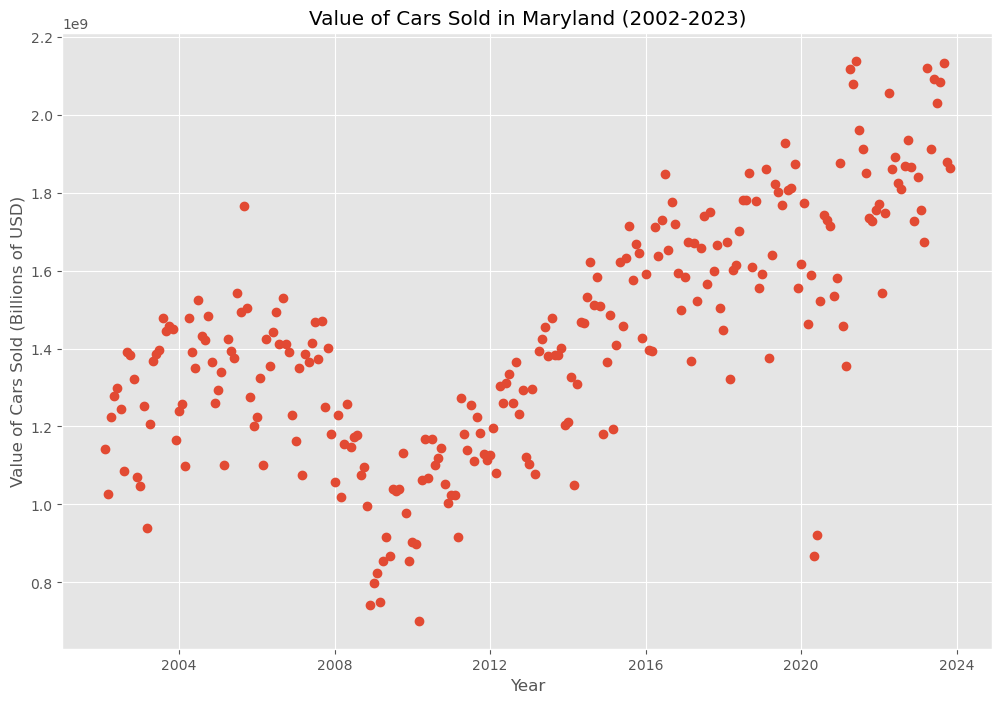

In [43]:
#We can refer back to our function that was created because called time_series
#Create a time series of the total value of cars sold each month 
#Total value includes the addition of new and used cars
monthly_value_cars_sold_ts = time_series(sales_data_month.index,sales_data_month['Total Value of Cars Sold'], 'Value of Cars Sold in Maryland (2002-2023)', 'Year', 'Value of Cars Sold (Billions of USD)')

##### Review of Value of Cars Sold in Maryland (2002-2023)
The relationship between year and value of cars sold in billions of dollars looks to be quite strong and linear. This is contrary to the cars sold data. There is a clear decline from 2002 to 2009, however there is an increase all the way up until the most recent data collection. There are two outliers that are in the beginning months of 2020 which is due to the Covid-19 pandemic. There is a clear increase in the value of cars sold from 2002 to 2023.

#### 1.1.3.2 Create a time series of yearly value of cars sold

In [44]:
#Make a new column called Total Value of Cars Sold in the sales_data_year
#Once this column is created and the sales of new and used cars are combined a new graph can be made
#This should smooth out the data to better understand the direction of Value of Cars Sold
sales_data_year['Total Value of Cars Sold'] = sales_data_year['Value of New Cars Sold'] + sales_data_year['Value of Used Cars Sold']
sales_data_year

,New Cars Sold,Used Cars Sold,Value of New Cars Sold,Value of Used Cars Sold,Cars Sold,Yearly Change in Cars Sold,Yearly Change in Cars Sold (%),Total Value of Cars Sold
Date,,,,,,,,
2003-01-01,402164,656089,9572554876,4940209772,1058253,NaN,NaN,14512764648
2004-01-01,428252,675358,10623148339,5166071497,1103610,45357.0,4.286026,15789219836
2005-01-01,428508,699677,10972956024,5385548947,1128185,24575.0,2.226783,16358504971
2006-01-01,421834,703835,11006733922,5639803515,1125669,-2516.0,-0.223013,16646537437
2007-01-01,399282,696968,10411657206,5865687318,1096250,-29419.0,-2.613468,16277344524
2008-01-01,378184,678549,9997917483,5794213869,1056733,-39517.0,-3.604743,15792131352
2009-01-01,309159,617885,7975401987,4896167840,927044,-129689.0,-12.272637,12871569827
2010-01-01,248928,608889,6686217914,4510040527,857817,-69227.0,-7.467499,11196258441
2011-01-01,268022,626045,7460915522,5054802303,894067,36250.0,4.225843,12515717825


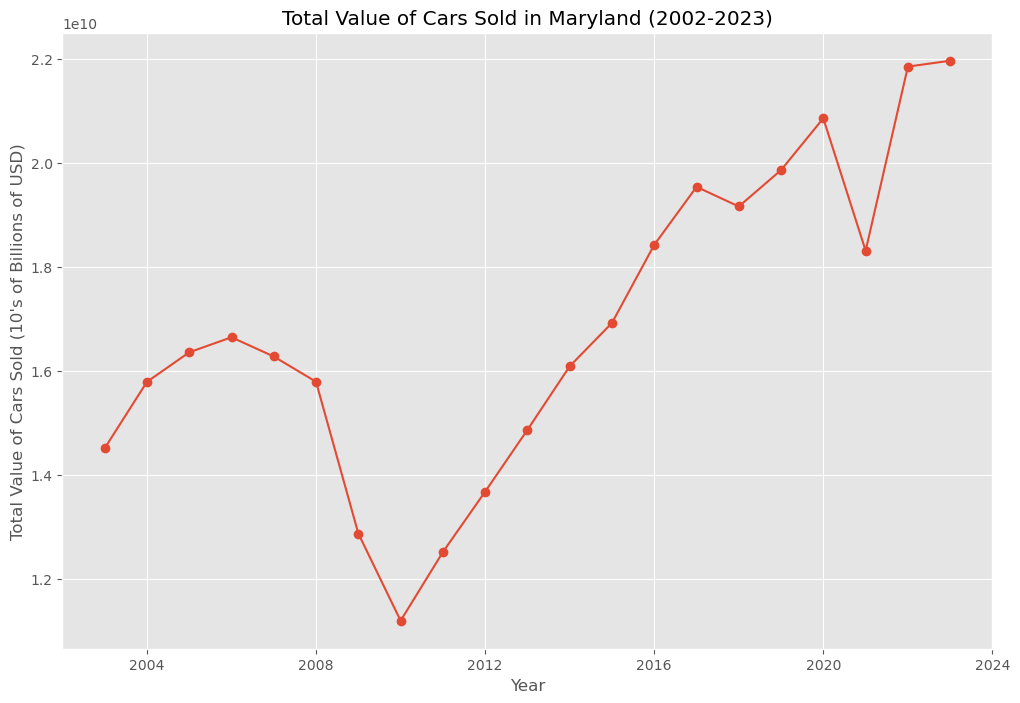

In [45]:
#Create a time series of the yearly smoothed data in respect to year
yearly_value_cars_sold_ts = time_series_lines(sales_data_year.index,sales_data_year['Total Value of Cars Sold'], 'Total Value of Cars Sold in Maryland (2002-2023)', 'Year',"Total Value of Cars Sold (10's of Billions of USD)" ,'o')

##### Review of Total Value of Cars Sold in Mary (2002-2023)
Smoothing the data allows for an even clearer understanding that the total value of Cars Sold in Maryland has increased since 2002 besides a period of downturn from 2005-2009. The increase from 2009 to 2019 is very close to being a linear relationship, despite the cars sold decrease. Later in this project the difference in growth of cars sold compared to the total value of cars sold. There is a clear increase in the value of cars sold ($USD) from 2002 to 2023. Using the year to year compared to month to month can represent the trends of the data more effectively.

#### 1.1.3.3 Finding the lowest and highest total value of cars sold per year

In [46]:
#Find the top 3 years for total value of cars sold in Maryland
highest_lowest_value_cars_sold_year = print_top_and_bottom_n(sales_data_year['Total Value of Cars Sold'], 3, 'Highest 3 Years for Value of Cars Sold', 'Lowest 3 Years for Value of Cars Sold')

Highest 3 Years for Value of Cars Sold
1. 2022 - 21,964,713,483.00
2. 2021 - 21,851,471,267.00
3. 2019 - 20,857,865,127.00

Lowest 3 Years for Value of Cars Sold
1. 2009 - 11,196,258,441.00
2. 2010 - 12,515,717,825.00
3. 2008 - 12,871,569,827.00


#### 1.1.3.4 Finding the lowest and highest total value of cars sold per month

In [47]:
#Find the bottom 3 years for total value of cars sold in Maryland
highest_lowest_value_cars_sold_month = print_top_and_bottom_n(sales_data_month['Total Value of Cars Sold'],3,'Highest 3 Months for Value of Cars Sold', 'Lowest 3 Months for Value of Cars Sold', True)

Highest 3 Months for Value of Cars Sold
1. June 2021 - 2,138,028,448.00
2. September 2023 - 2,131,035,952.00
3. April 2023 - 2,118,107,393.00

Lowest 3 Months for Value of Cars Sold
1. March 2010 - 701,892,920.00
2. December 2008 - 742,859,379.00
3. March 2009 - 750,897,188.00


#### 1.1.3.5 Analyse the overall trend in value of cars sold

In [48]:
#The number of cars sold following the global financial crises fell by a substantial amount
#Let's see the difference during a similar time period for the value of cars sold
#It is important to note that 2010-01-01 represents the cars sold in 2009
value_cars_sold_2007 = sales_data_year.loc['2008-01-01', 'Total Value of Cars Sold']
value_cars_sold_2009 = sales_data_year.loc['2010-01-01', 'Total Value of Cars Sold']
#Find the percentage difference between 2007 and 2009
value_cars_sold_post_gfc = ((value_cars_sold_2009-value_cars_sold_2007)/value_cars_sold_2007)*100
#Print this value out
print(f"Percentage difference between 2007 and 2009: {value_cars_sold_post_gfc:.2f}%")

Percentage difference between 2007 and 2009: -29.10%


In [49]:
#The number of cars sold following Covid-19 pandemic fell by a substantial amount
#Let's see the difference during a similar time period in the value of cars sold
#It is important to note that a value like 2010-01-01 represents the cars sold in 2009
value_cars_sold_2019 = sales_data_year.loc['2020-01-01', 'Total Value of Cars Sold']
value_cars_sold_2020 = sales_data_year.loc['2021-01-01', 'Total Value of Cars Sold']
#Find the percentage difference between 2019 and 2020
value_cars_sold_post_covid = ((value_cars_sold_2020-value_cars_sold_2019)/value_cars_sold_2019)*100
#Print this value out
print(f"Percentage difference between 2019 and 2020: {value_cars_sold_post_covid:.2f}%")

Percentage difference between 2019 and 2020: -12.21%


In [50]:
#Increase after gfc to covid-19
#Prior to reviewing the line time series that has been created it will be useful to gain some numerical information to add to the analysis
#Find the increase in sales post global financial crises
#It is important to note that 2010-01-01 represents the cars sold in 2009, same with 2020-01-01 as 2019
value_cars_sold_2009 = sales_data_year.loc['2010-01-01', 'Total Value of Cars Sold']
value_cars_sold_2019 = sales_data_year.loc['2020-01-01', 'Total Value of Cars Sold']
#Find the percentage difference between 2009 and 2019
value_cars_sold_gfc_to_covid = ((value_cars_sold_2019-value_cars_sold_2009)/value_cars_sold_2009)*100
#Print this value out
print(f"Percentage difference between 2009 and 2019: {value_cars_sold_gfc_to_covid:.2f}%")

Percentage difference between 2009 and 2019: 86.29%


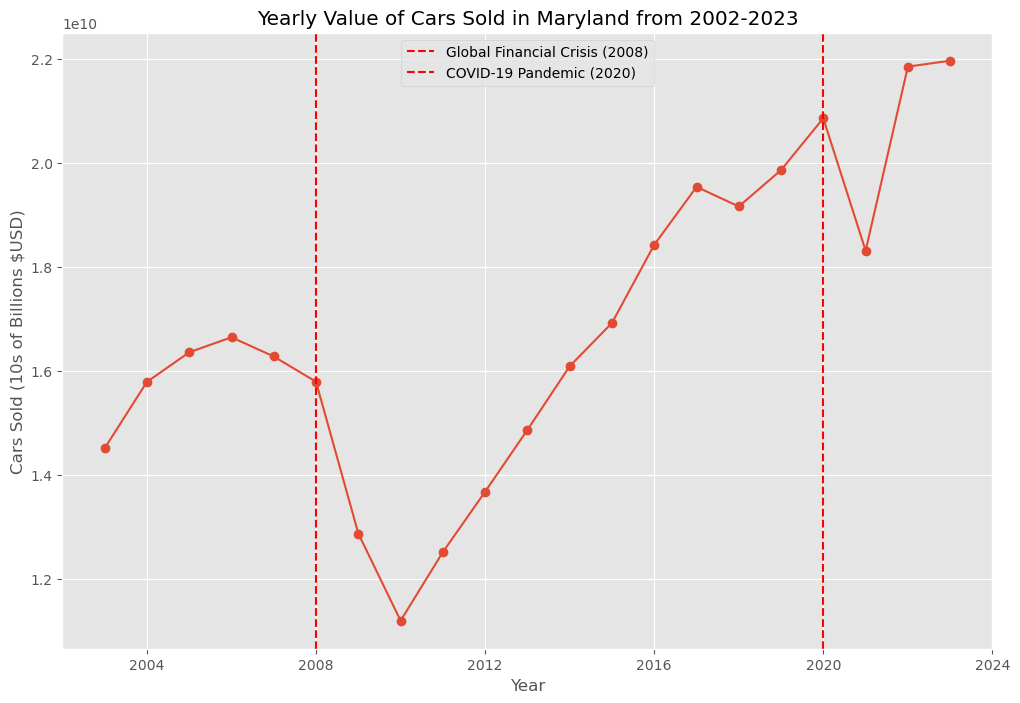

In [51]:
#The code above has been to gain a better understanding of how these global events impacted sales
#To further prove this, add in vertical lines representing when Covid-19 (2020) and the Global Financial Crisis (2008) took place
#This will represent how their events impacted the number of cars sold
years_of_importance = {'Global Financial Crisis':2008, 'COVID-19 Pandemic':2020}
yearly_value_cars_sold_with_vert = time_series_lines(sales_data_year.index,sales_data_year['Total Value of Cars Sold'], 'Yearly Value of Cars Sold in Maryland from 2002-2023', 'Year', 'Cars Sold (10s of Billions $USD)', 'o')
for event, year in years_of_importance.items():
    plt.axvline(x=pd.to_datetime(str(year)), color='red', linestyle='--', label=f'{event} ({year})')
plt.legend()
#Remember to note that the datapoint 2020 represents the sales of 2019, hence why it is high

### 1.1.4 Explore Growth in Value of Cars Sold
Goals: 
1. Create a time series in value of monthly growth rates
2. List highest and lowest value of monthly growth rates
3. Create a time series in value of yearly growth rates
4. List highest and lowest yearly value of growth rater
5. analyse overall trend in number of cars sold

#### 1.1.4.1 Create a time series in value of monthly growth rates

In [52]:
#Ceate a new column called monthly change in value of cars sold which looks at the change in the value of cars sold from one month to the next
sales_data_month['Monthly Change in Value of Cars Sold'] = sales_data_month['Total Value of Cars Sold'].diff()
#Make this into a percentage as well
sales_data_month['Monthly Change in Value of Cars Sold (%)'] = sales_data_month['Monthly Change in Value of Cars Sold (%)'] = sales_data_month['Total Value of Cars Sold'].pct_change() * 100
sales_data_month

,New Cars Sold,Used Cars Sold,Value of New Cars Sold,Value of Used Cars Sold,Cars Sold,Monthly Change in Cars Sold,Monthly Change in Cars Sold (%),Total Value of Cars Sold,Monthly Change in Value of Cars Sold,Monthly Change in Value of Cars Sold (%)
Date,,,,,,,,,,
2002-02-01,31106,49927,755015820,386481929,81033,NaN,NaN,1141497749,NaN,NaN
2002-03-01,27520,50982,664454223,361353242,78502,-2531.0,-3.123419,1025807465,-115690284.0,-10.134955
2002-04-01,34225,58794,805666244,419385387,93019,14517.0,18.492522,1225051631,199244166.0,19.423154
2002-05-01,36452,59817,846368297,433061150,96269,3250.0,3.493910,1279429447,54377816.0,4.438818
2002-06-01,37359,60577,855005784,442569410,97936,1667.0,1.731606,1297575194,18145747.0,1.418269
...,...,...,...,...,...,...,...,...,...,...
2023-07-01,27001,50613,1214340987,814275863,77614,-2174.0,-2.724721,2028616850,-61480796.0,-2.941527
2023-08-01,26360,49502,1196918451,887723892,75862,-1752.0,-2.257325,2084642343,56025493.0,2.761758
2023-09-01,25876,52725,1222581892,908454060,78601,2739.0,3.610503,2131035952,46393609.0,2.225495


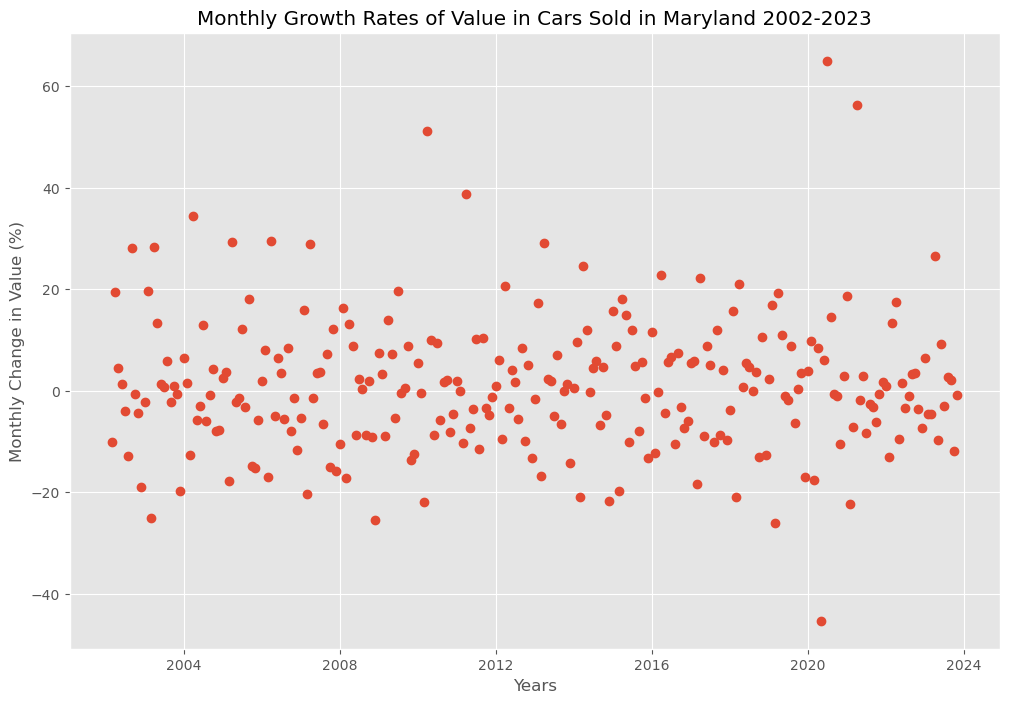

In [53]:
#Create the monthly time series of change in value of cars sold as a percentage vs time using the function time series 
value_monthly_growth_pct_ts = time_series(sales_data_month.index, sales_data_month['Monthly Change in Value of Cars Sold (%)'],'Monthly Growth Rates of Value in Cars Sold in Maryland 2002-2023', 'Years','Monthly Change in Value (%)')

#### 1.1.4.2 List highest and lowest value of monthly growth rates

In [54]:
#Use the function that was created to find the high and the lowest value of monthly growth rates
print_top_and_bottom_n(sales_data_month['Monthly Change in Value of Cars Sold (%)'],5,'The months with the highest change in value:','The months with the lowest change in value:', True,True)

The months with the highest change in value:
1. July 2020 - 65.03%
2. April 2021 - 56.23%
3. April 2010 - 51.26%
4. April 2011 - 38.85%
5. April 2004 - 34.45%

The months with the lowest change in value:
1. May 2020 - -45.28%
2. March 2019 - -26.10%
3. December 2008 - -25.50%
4. March 2003 - -25.07%
5. February 2021 - -22.37%


#### 1.1.4.3 Create a time series of yearly growth rates

In [55]:
#Ceate a new column called yearly change in value of cars sold which looks at the change in the value of cars sold from one year to the next
sales_data_year['Yearly Change in Value of Cars Sold'] = sales_data_year['Total Value of Cars Sold'].diff()
#Now create the same column but as a percentage of the change
sales_data_year['Yearly Change in Value of Cars Sold (%)'] = (sales_data_year['Total Value of Cars Sold'].pct_change())*100
#View the new columns
sales_data_year

,New Cars Sold,Used Cars Sold,Value of New Cars Sold,Value of Used Cars Sold,Cars Sold,Yearly Change in Cars Sold,Yearly Change in Cars Sold (%),Total Value of Cars Sold,Yearly Change in Value of Cars Sold,Yearly Change in Value of Cars Sold (%)
Date,,,,,,,,,,
2003-01-01,402164,656089,9572554876,4940209772,1058253,NaN,NaN,14512764648,NaN,NaN
2004-01-01,428252,675358,10623148339,5166071497,1103610,45357.0,4.286026,15789219836,1.276455e+09,8.795396
2005-01-01,428508,699677,10972956024,5385548947,1128185,24575.0,2.226783,16358504971,5.692851e+08,3.605530
2006-01-01,421834,703835,11006733922,5639803515,1125669,-2516.0,-0.223013,16646537437,2.880325e+08,1.760751
2007-01-01,399282,696968,10411657206,5865687318,1096250,-29419.0,-2.613468,16277344524,-3.691929e+08,-2.217836
2008-01-01,378184,678549,9997917483,5794213869,1056733,-39517.0,-3.604743,15792131352,-4.852132e+08,-2.980911
2009-01-01,309159,617885,7975401987,4896167840,927044,-129689.0,-12.272637,12871569827,-2.920562e+09,-18.493777
2010-01-01,248928,608889,6686217914,4510040527,857817,-69227.0,-7.467499,11196258441,-1.675311e+09,-13.015595
2011-01-01,268022,626045,7460915522,5054802303,894067,36250.0,4.225843,12515717825,1.319459e+09,11.784824


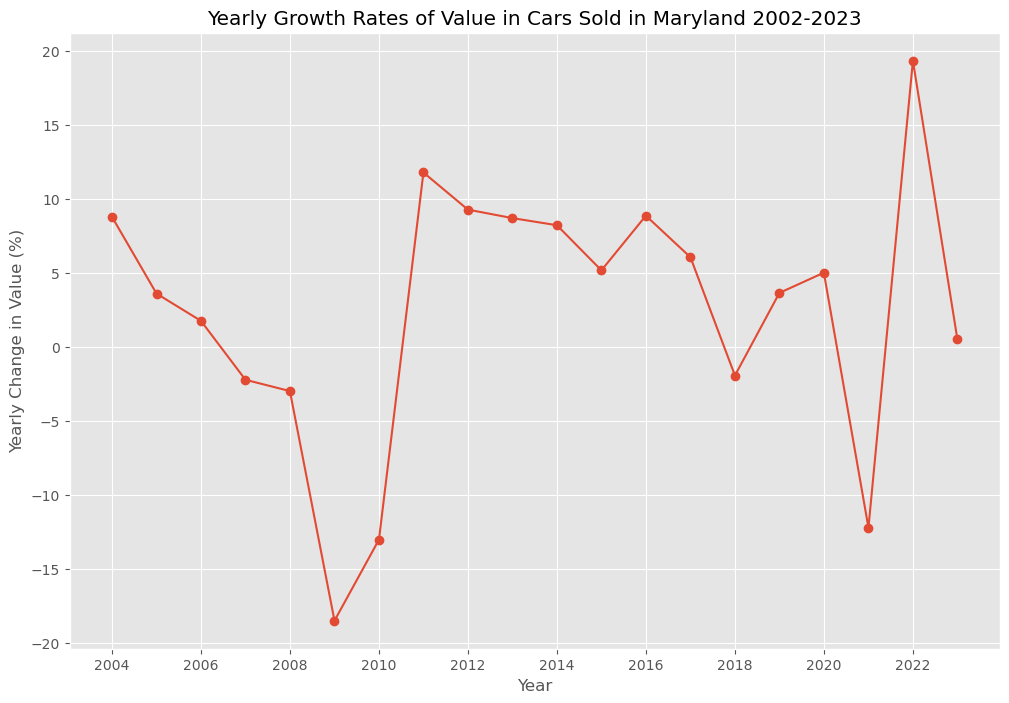

In [56]:
#Create the yearly time series of change in value of cars sold as a percentage vs time using the function time series line
yearly_change_value_cars_sold_pct_ts = time_series_lines(sales_data_year.index, sales_data_year['Yearly Change in Value of Cars Sold (%)'],'Yearly Growth Rates of Value in Cars Sold in Maryland 2002-2023', 'Year', 'Yearly Change in Value (%)','o')

#### 1.1.4.4 List highest and lowest value of yearly growth rates

In [57]:
print_top_and_bottom_n(sales_data_year['Yearly Change in Value of Cars Sold (%)'], 5, 'The years with the highest change in value of cars sold:', 'The years with the lowest change in value of cars sold:',False,True)

The years with the highest change in value of cars sold:
1. 2021 - 19.34%
2. 2010 - 11.78%
3. 2011 - 9.28%
4. 2015 - 8.87%
5. 2003 - 8.80%

The years with the lowest change in value of cars sold:
1. 2008 - -18.49%
2. 2009 - -13.02%
3. 2020 - -12.21%
4. 2007 - -2.98%
5. 2006 - -2.22%


#### 1.1.4.5 Analyse the overall trends in growth of value of cars sold

## 1.2 New Cars Sold in Maryland

### 1.2 Introduction to New Cars Sold
The past two sections have combined new and used cars sold to create a total car component of the data. This was done to understand the overall trends of the automotive industry in Maryland. From what was observed, there was a decrease in cars sold but an increase in the value of cars sold. This section is going to explore the new cars industry in Maryland.

In [58]:
#Let's observe new cars sold in the original dataframe sales data month
sales_data_month

,New Cars Sold,Used Cars Sold,Value of New Cars Sold,Value of Used Cars Sold,Cars Sold,Monthly Change in Cars Sold,Monthly Change in Cars Sold (%),Total Value of Cars Sold,Monthly Change in Value of Cars Sold,Monthly Change in Value of Cars Sold (%)
Date,,,,,,,,,,
2002-02-01,31106,49927,755015820,386481929,81033,NaN,NaN,1141497749,NaN,NaN
2002-03-01,27520,50982,664454223,361353242,78502,-2531.0,-3.123419,1025807465,-115690284.0,-10.134955
2002-04-01,34225,58794,805666244,419385387,93019,14517.0,18.492522,1225051631,199244166.0,19.423154
2002-05-01,36452,59817,846368297,433061150,96269,3250.0,3.493910,1279429447,54377816.0,4.438818
2002-06-01,37359,60577,855005784,442569410,97936,1667.0,1.731606,1297575194,18145747.0,1.418269
...,...,...,...,...,...,...,...,...,...,...
2023-07-01,27001,50613,1214340987,814275863,77614,-2174.0,-2.724721,2028616850,-61480796.0,-2.941527
2023-08-01,26360,49502,1196918451,887723892,75862,-1752.0,-2.257325,2084642343,56025493.0,2.761758
2023-09-01,25876,52725,1222581892,908454060,78601,2739.0,3.610503,2131035952,46393609.0,2.225495


In [59]:
#It is clear that the space is starting to get conjested with different columns
#It is time to create a new dataframe on top of the current one that contains new cars sold data
#Create a list of the columns from the original dataset that is going to contain the relevant information of new cars
new_cars_column = ['New Cars Sold', 'Value of New Cars Sold']

In [60]:
#Create a new dataframe from the existing sales data month dataframe
sales_data_new_cars_month = sales_data_month[new_cars_column].copy()
#Reminder that the date such as 2002-02-01 is the total sales from each day within the month of January 2002
sales_data_new_cars_month

,New Cars Sold,Value of New Cars Sold
Date,,
2002-02-01,31106,755015820
2002-03-01,27520,664454223
2002-04-01,34225,805666244
2002-05-01,36452,846368297
2002-06-01,37359,855005784
...,...,...
2023-07-01,27001,1214340987
2023-08-01,26360,1196918451
2023-09-01,25876,1222581892


In [61]:
#Do the same as above but for the years dataframe
sales_data_new_cars_year = sales_data_year[new_cars_column].copy()
#Reminder that the year 2003-01-01 is from the months that lie within 2002
sales_data_new_cars_year

,New Cars Sold,Value of New Cars Sold
Date,,
2003-01-01,402164,9572554876
2004-01-01,428252,10623148339
2005-01-01,428508,10972956024
2006-01-01,421834,11006733922
2007-01-01,399282,10411657206
2008-01-01,378184,9997917483
2009-01-01,309159,7975401987
2010-01-01,248928,6686217914
2011-01-01,268022,7460915522


### 1.2.1 Overall trends in New Cars Sold
Goals:
1. Create a time series of monthly number of new cars sold
2. List highest & lowest selling months of new cars sold
3. Create a time series of yearly number of new cars sold
4. List highest & lowest selling years of new cars sold
5. Analyse the overall trends in new cars sold

#### 1.2.1.1 Create a time series of monthly number of new cars sold

In [62]:
#Observe the sales data new car month
sales_data_new_cars_month

,New Cars Sold,Value of New Cars Sold
Date,,
2002-02-01,31106,755015820
2002-03-01,27520,664454223
2002-04-01,34225,805666244
2002-05-01,36452,846368297
2002-06-01,37359,855005784
...,...,...
2023-07-01,27001,1214340987
2023-08-01,26360,1196918451
2023-09-01,25876,1222581892


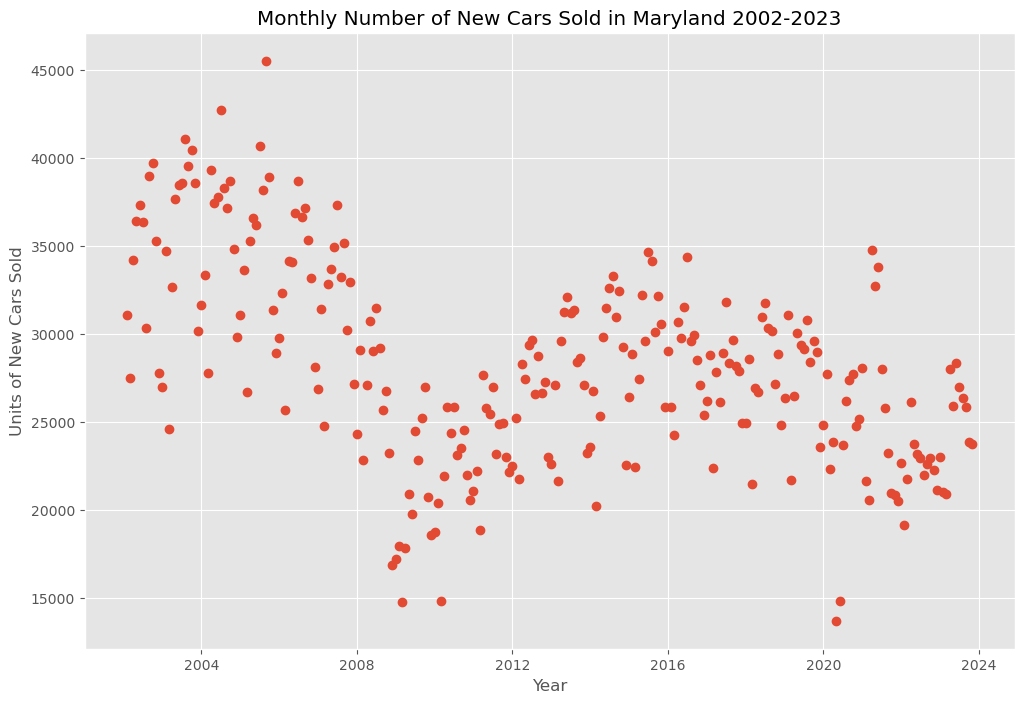

In [63]:
monthly_new_cars_sold_ts = time_series(sales_data_new_cars_month.index,sales_data_new_cars_month['New Cars Sold'],'Monthly Number of New Cars Sold in Maryland 2002-2023', 'Year', 'Units of New Cars Sold')

#### 1.2.1.2 List highest & lowest new cars sold per month

In [64]:
#Use the function to Find the highest and lowest number of new cars sold per month from 2002-2023
print_top_and_bottom_n(sales_data_new_cars_month['New Cars Sold'], 5, 'Highest number of new cars sold:', 'Lowest number of new cars sold:', True)

Highest number of new cars sold:
1. September 2005 - 45,547.00
2. July 2004 - 42,758.00
3. August 2003 - 41,088.00
4. July 2005 - 40,674.00
5. October 2003 - 40,464.00

Lowest number of new cars sold:
1. May 2020 - 13,700.00
2. March 2009 - 14,779.00
3. March 2010 - 14,809.00
4. June 2020 - 14,835.00
5. December 2008 - 16,842.00


#### 1.2.1.3 Create a time series of yearly number of new cars sold

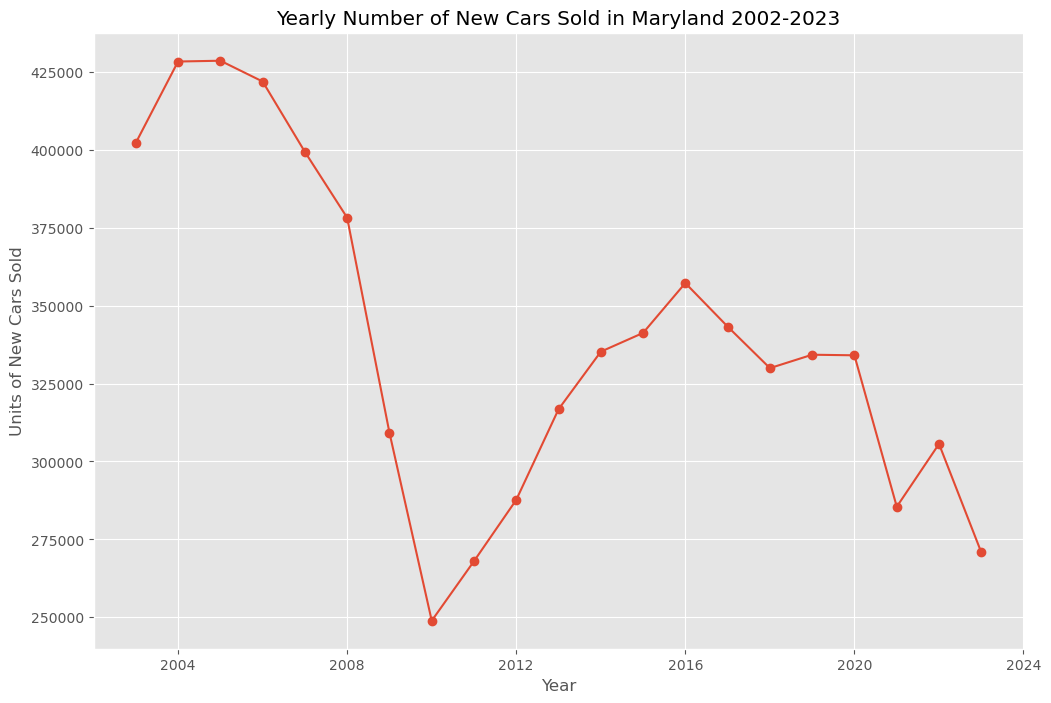

In [65]:
#Use the function to create a time series with a line of new cars sold from 2002-2023
yearly_new_cars_sold_ts = time_series_lines(sales_data_year.index, sales_data_year['New Cars Sold'], 'Yearly Number of New Cars Sold in Maryland 2002-2023', 'Year', 'Units of New Cars Sold','o')

#### 1.2.1.4 List highest & lowest new cars sold per year

In [66]:
#Use the function to produce the highest and lowest new cars sold per year
print_top_and_bottom_n(sales_data_year['New Cars Sold'], 5, 'Highest number of new cars sold per year', 'Lowest number of new cars sold per year')

Highest number of new cars sold per year
1. 2004 - 428,508.00
2. 2003 - 428,252.00
3. 2005 - 421,834.00
4. 2002 - 402,164.00
5. 2006 - 399,282.00

Lowest number of new cars sold per year
1. 2009 - 248,928.00
2. 2010 - 268,022.00
3. 2022 - 270,882.00
4. 2020 - 285,480.00
5. 2011 - 287,669.00


#### 1.2.1.5 Analyse the overall trends in new cars sold

### 1.2.2 Explore Growth of Number of New Cars Sold
Goals:
1. Create a time series of monthly change in the number of new cars sold
2. List highest & lowest change in new cars sold per month
3. Create a time series of yearly change in the number of new cars sold
4. List highest & lowest change in new cars sold per year
5. Analyse the overall trends in new cars sold

#### 1.2.2.1 Create a time series of monthly change in the number of cars sold

In [67]:
#First is to create a new column called monthly change in value of new cars sold in the new dataframe sales data new cars month
sales_data_new_cars_month['Monthly Change in Number of New Cars Sold'] = sales_data_new_cars_month['New Cars Sold'].diff()
#Create the same as a percentage differrence from the number of new cars sold from the month before 
sales_data_new_cars_month['Monthly Change in Number of New Cars Sold (%)'] = (sales_data_new_cars_month['New Cars Sold'].pct_change())*100
sales_data_new_cars_month

,New Cars Sold,Value of New Cars Sold,Monthly Change in Number of New Cars Sold,Monthly Change in Number of New Cars Sold (%)
Date,,,,
2002-02-01,31106,755015820,NaN,NaN
2002-03-01,27520,664454223,-3586.0,-11.528323
2002-04-01,34225,805666244,6705.0,24.364099
2002-05-01,36452,846368297,2227.0,6.506939
2002-06-01,37359,855005784,907.0,2.488204
...,...,...,...,...
2023-07-01,27001,1214340987,-1371.0,-4.832229
2023-08-01,26360,1196918451,-641.0,-2.373986
2023-09-01,25876,1222581892,-484.0,-1.836115


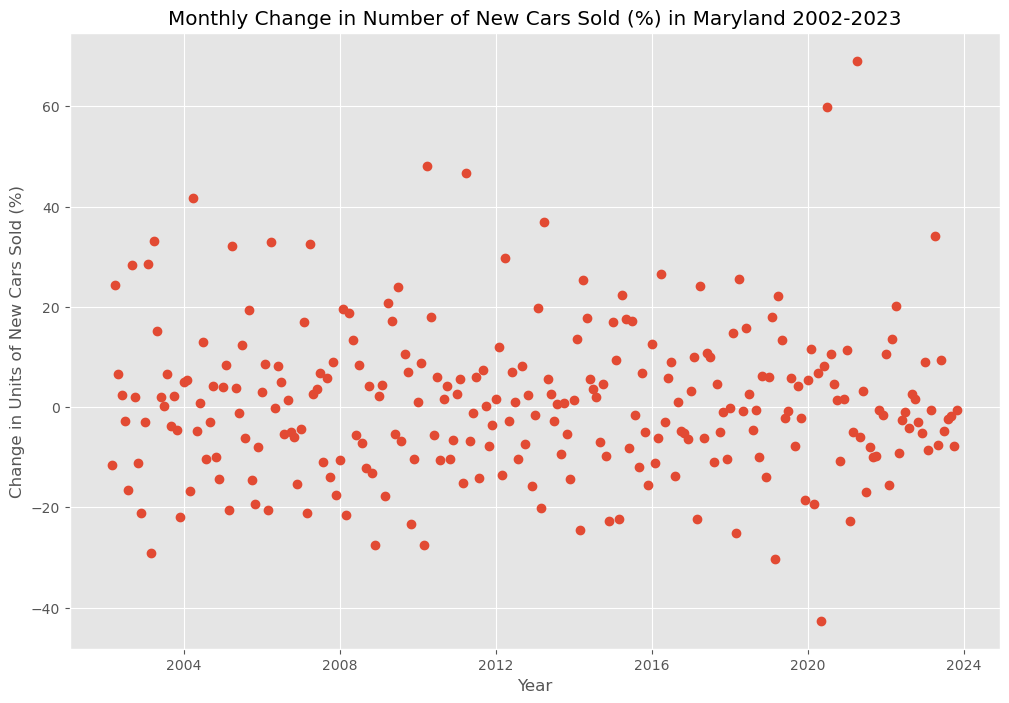

In [68]:
#Create a time series using the function to see a visualisation of the number of new cars sold from month to month
monthly_change_new_cars_sold_pct_ts = time_series(sales_data_new_cars_month.index, sales_data_new_cars_month['Monthly Change in Number of New Cars Sold (%)'], 'Monthly Change in Number of New Cars Sold (%) in Maryland 2002-2023', 'Year', 'Change in Units of New Cars Sold (%)')

#### 1.2.2.2 List the highest and lowest change in new cars sold per month

In [69]:
#Create a list of the highest and lowest change in total number of new cars sold
print_top_and_bottom_n(sales_data_new_cars_month['Monthly Change in Number of New Cars Sold (%)'], 5, 'Highest change in new cars sold per month:', 'Lowest change in new cars sold per month:',True,True)

Highest change in new cars sold per month:
1. April 2021 - 69.08%
2. July 2020 - 59.78%
3. April 2010 - 48.02%
4. April 2011 - 46.67%
5. April 2004 - 41.61%

Lowest change in new cars sold per month:
1. May 2020 - -42.61%
2. March 2019 - -30.22%
3. March 2003 - -29.16%
4. March 2010 - -27.47%
5. December 2008 - -27.46%


#### 1.2.2.3 Create a time series of yearly change in the number of new cars sold 

In [70]:
#The first step is to go into the new sales data new cars year
#Then create a new column that has the change from one year to the next
sales_data_new_cars_year['Yearly Change in Number of New Cars Sold'] = sales_data_new_cars_year['New Cars Sold'].diff()
#Do the same but make it as a percentage difference from one month to the next 
sales_data_new_cars_year['Yearly Change in Number of New Cars Sold (%)'] = (sales_data_new_cars_year['New Cars Sold'].pct_change())*100
sales_data_new_cars_year

,New Cars Sold,Value of New Cars Sold,Yearly Change in Number of New Cars Sold,Yearly Change in Number of New Cars Sold (%)
Date,,,,
2003-01-01,402164,9572554876,NaN,NaN
2004-01-01,428252,10623148339,26088.0,6.486906
2005-01-01,428508,10972956024,256.0,0.059778
2006-01-01,421834,11006733922,-6674.0,-1.557497
2007-01-01,399282,10411657206,-22552.0,-5.346179
2008-01-01,378184,9997917483,-21098.0,-5.283985
2009-01-01,309159,7975401987,-69025.0,-18.251698
2010-01-01,248928,6686217914,-60231.0,-19.482208
2011-01-01,268022,7460915522,19094.0,7.670491


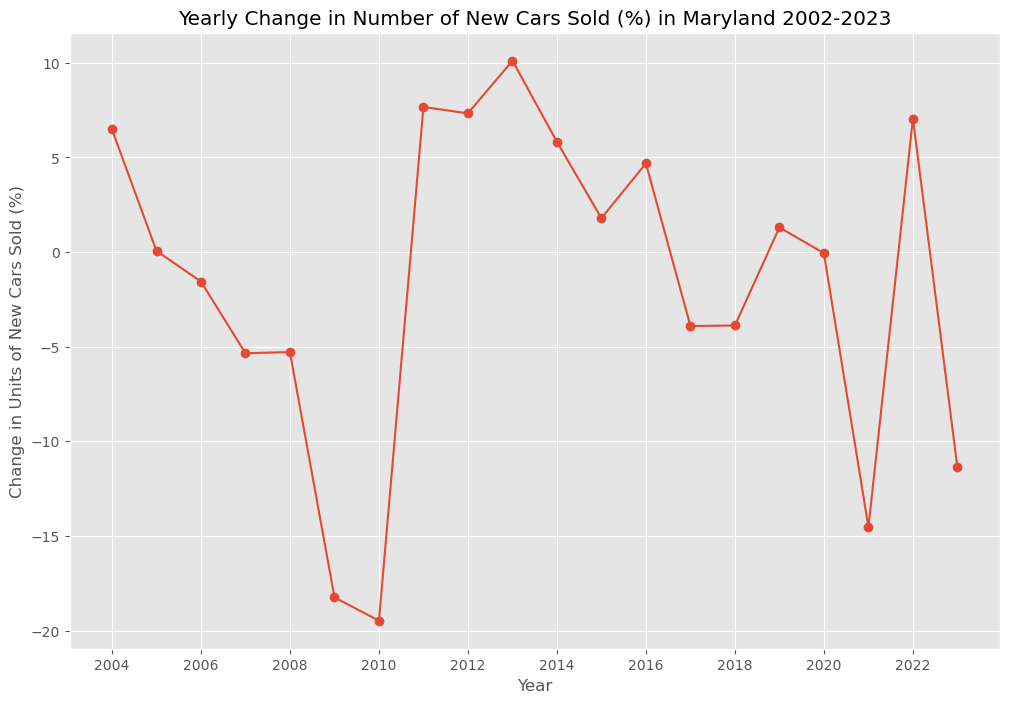

In [71]:
#Create a time series of the new yearly change in number of new cars sold as a percentage compared to the years
yearly_change_new_cars_sold_pct_ts = time_series_lines(sales_data_new_cars_year.index, sales_data_new_cars_year['Yearly Change in Number of New Cars Sold (%)'], 'Yearly Change in Number of New Cars Sold (%) in Maryland 2002-2023','Year', 'Change in Units of New Cars Sold (%)','o')

#### 1.2.2.4 List the highest and lowest change in new cars sold per year

In [72]:
#Create a list of the highest and lowest change in new cars sold per year
print_top_and_bottom_n(sales_data_new_cars_year['Yearly Change in Number of New Cars Sold (%)'], 5,'Highest change in number of new cars sold:', 'Lowest change in number of new cars sold:',False,True)

Highest change in number of new cars sold:
1. 2012 - 10.11%
2. 2010 - 7.67%
3. 2011 - 7.33%
4. 2021 - 7.06%
5. 2003 - 6.49%

Lowest change in number of new cars sold:
1. 2009 - -19.48%
2. 2008 - -18.25%
3. 2020 - -14.54%
4. 2022 - -11.37%
5. 2006 - -5.35%


#### 1.2.2.5 Analyse the overall trend in new cars sold

### 1.2.3 Identify Overall Trends in Value of New Cars Sold
Goals:
1. Create a time series of monthly value of new cars sold
2. List highest & lowest selling values of new cars sold per month
3. Create a time series of yearly value of new cars sold
4. List highest & lowest selling values of new cars sold per year
5. Analyse the overall trends in value of new cars sold

#### 1.2.3.1 Create a time series of monthly value of new cars sold

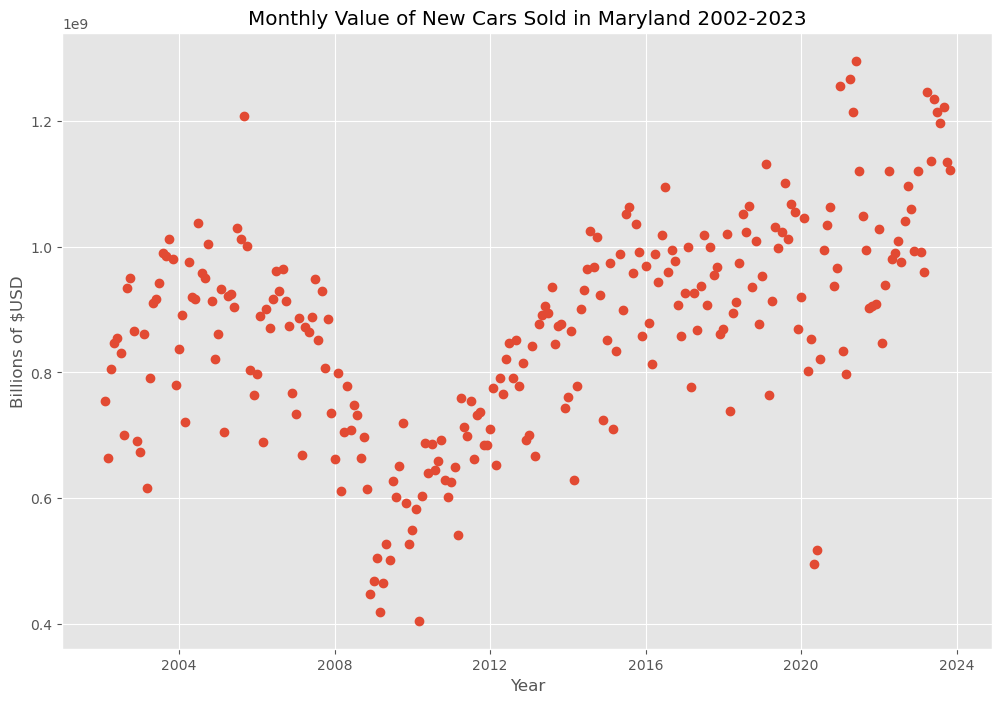

In [73]:
#Use the function to create a time series of the value of new cars sold
monthly_value_new_cars_sold_ts = time_series(sales_data_new_cars_month.index,sales_data_new_cars_month['Value of New Cars Sold'],'Monthly Value of New Cars Sold in Maryland 2002-2023','Year','Billions of $USD')

#### 1.2.3.2 List highest and lowest selling values of new cars sold per month

In [74]:
#Create a list of the highest and lowest months of the value of new cars sold
print_top_and_bottom_n(sales_data_new_cars_month['Value of New Cars Sold'], 5, 'Highest value of new cars sold per month:', 'Lowest value of new cars sold per month:',True)

Highest value of new cars sold per month:
1. June 2021 - 1,295,819,889.00
2. April 2021 - 1,267,127,282.00
3. January 2021 - 1,256,023,978.00
4. April 2023 - 1,245,687,446.00
5. June 2023 - 1,234,582,275.00

Lowest value of new cars sold per month:
1. March 2010 - 405,189,138.00
2. March 2009 - 418,843,100.00
3. December 2008 - 447,337,415.00
4. April 2009 - 465,300,148.00
5. January 2009 - 469,069,897.00


#### 1.2.3.3 Create a time series of yearly value of new cars sold

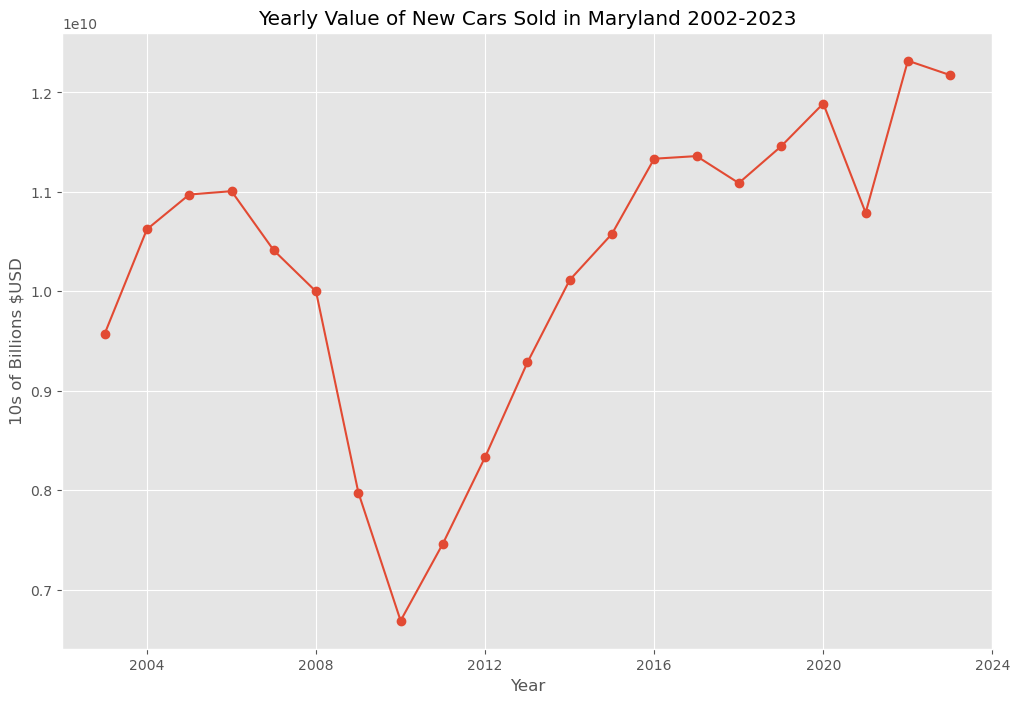

In [75]:
#Create a time series from sales data new cars sold per year looking at the yearly value of new cars sold
yearly_value_new_cars_sold_ts = time_series_lines(sales_data_new_cars_year.index,sales_data_new_cars_year['Value of New Cars Sold'],'Yearly Value of New Cars Sold in Maryland 2002-2023', 'Year','10s of Billions $USD','o')

#### 1.2.3.4 List highest and lowest selling values of new cars sold per year

In [76]:
#Create a list of the highest and lowest selling values of new cars sold per year
print_top_and_bottom_n(sales_data_new_cars_year['Value of New Cars Sold'],5,'Highest value of new cars sold per year:', 'Lowest value of new cars sold per year:',False)

Highest value of new cars sold per year:
1. 2021 - 12,318,885,531.00
2. 2022 - 12,174,274,135.00
3. 2019 - 11,888,570,426.00
4. 2018 - 11,457,150,438.00
5. 2016 - 11,359,554,563.00

Lowest value of new cars sold per year:
1. 2009 - 6,686,217,914.00
2. 2010 - 7,460,915,522.00
3. 2008 - 7,975,401,987.00
4. 2011 - 8,331,732,402.00
5. 2012 - 9,284,994,339.00


#### 1.2.3.5 Analyse the overall trends in value of new cars sold

### 1.2.4 Explore Growth in Value of New Cars Sold
Goals:
1. Create a time series of monthly change in the value of of new cars sold
2. List highest & lowest selling change in value of new cars sold per month
3. Create a time series of yearly change in the value of of new cars sold
4. List highest & lowest selling change in value of new cars sold per year
5. Analyse the overall trends change in value of new cars sold

#### 1.2.4.1 Create a time series of monthly change in value of new cars sold

In [77]:
#Create a new column in sales data new cars sold year called Monthly Change in value of new cars sold
#This is going to be created using the difference function
sales_data_new_cars_month['Monthly Change in Value of New Cars Sold'] = sales_data_new_cars_month['Value of New Cars Sold'].diff()
#Do the same but as a percentage using the percentage change function
sales_data_new_cars_month['Monthly Change in Value of New Cars Sold (%)'] = (sales_data_new_cars_month['Value of New Cars Sold'].pct_change())*100
sales_data_new_cars_month

,New Cars Sold,Value of New Cars Sold,Monthly Change in Number of New Cars Sold,Monthly Change in Number of New Cars Sold (%),Monthly Change in Value of New Cars Sold,Monthly Change in Value of New Cars Sold (%)
Date,,,,,,
2002-02-01,31106,755015820,NaN,NaN,NaN,NaN
2002-03-01,27520,664454223,-3586.0,-11.528323,-90561597.0,-11.994662
2002-04-01,34225,805666244,6705.0,24.364099,141212021.0,21.252333
2002-05-01,36452,846368297,2227.0,6.506939,40702053.0,5.051974
2002-06-01,37359,855005784,907.0,2.488204,8637487.0,1.020535
...,...,...,...,...,...,...
2023-07-01,27001,1214340987,-1371.0,-4.832229,-20241288.0,-1.639525
2023-08-01,26360,1196918451,-641.0,-2.373986,-17422536.0,-1.434732
2023-09-01,25876,1222581892,-484.0,-1.836115,25663441.0,2.144126


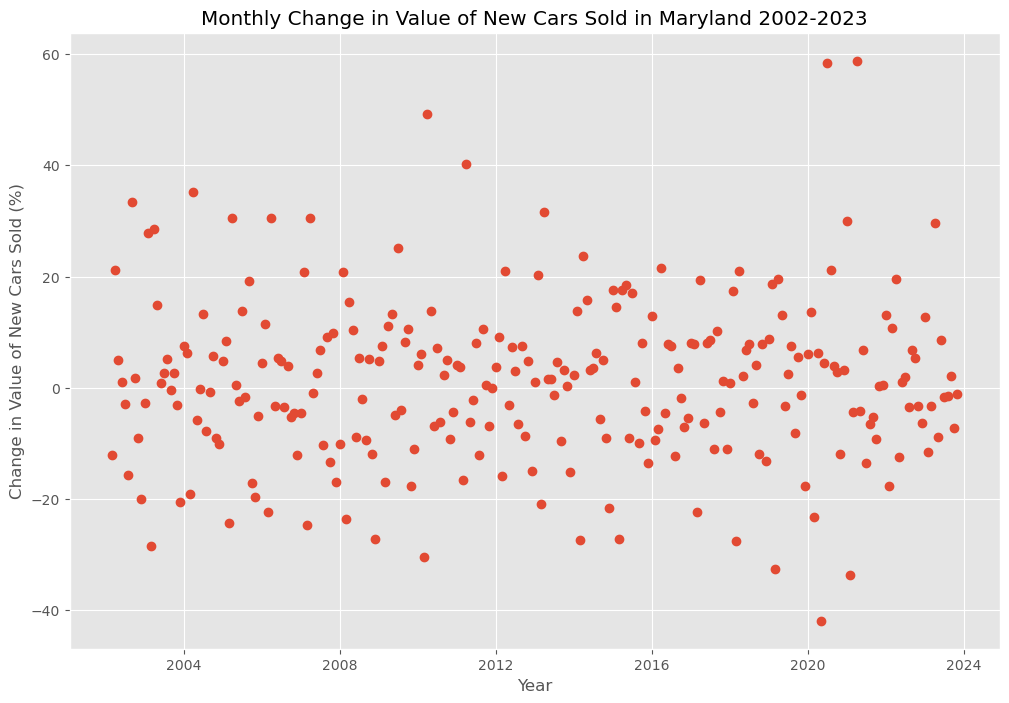

In [78]:
#Create a time series of the change in value of new cars sold per month
monthly_change_value_new_cars_sold_pct_ts = time_series(sales_data_new_cars_month.index,sales_data_new_cars_month['Monthly Change in Value of New Cars Sold (%)'],'Monthly Change in Value of New Cars Sold in Maryland 2002-2023', 'Year','Change in Value of New Cars Sold (%)')

#### 1.2.4.2 List highest & lowest selling change in value of new cars sold per month

In [79]:
#Create a list of the highest and lowest changes in value of new cars sold per month
print_top_and_bottom_n(sales_data_new_cars_month['Monthly Change in Value of New Cars Sold (%)'], 5,'Highest change in value of new cars sold per month:', 'Lowest change in value of new cars sold per year:',True,True)

Highest change in value of new cars sold per month:
1. April 2021 - 58.81%
2. July 2020 - 58.46%
3. April 2010 - 49.14%
4. April 2011 - 40.25%
5. April 2004 - 35.20%

Lowest change in value of new cars sold per year:
1. May 2020 - -41.88%
2. February 2021 - -33.58%
3. March 2019 - -32.53%
4. March 2010 - -30.39%
5. March 2003 - -28.46%


#### 1.2.4.3 Create a time series of yearly change in the value of number of new cars sold

In [80]:
#Create a time series of yearly change in value of new cars sold
#Create a new column for the yearly change in value of new cars sold
sales_data_new_cars_year['Yearly Change in Value of New Cars Sold'] = sales_data_new_cars_year['Value of New Cars Sold'].diff()
#Create a new column for the yearly change in value of new cars sold as a percentage
sales_data_new_cars_year['Yearly Change in Value of New Cars Sold (%)'] = (sales_data_new_cars_year['Value of New Cars Sold'].pct_change())*100
sales_data_new_cars_year

,New Cars Sold,Value of New Cars Sold,Yearly Change in Number of New Cars Sold,Yearly Change in Number of New Cars Sold (%),Yearly Change in Value of New Cars Sold,Yearly Change in Value of New Cars Sold (%)
Date,,,,,,
2003-01-01,402164,9572554876,NaN,NaN,NaN,NaN
2004-01-01,428252,10623148339,26088.0,6.486906,1.050593e+09,10.975058
2005-01-01,428508,10972956024,256.0,0.059778,3.498077e+08,3.292881
2006-01-01,421834,11006733922,-6674.0,-1.557497,3.377790e+07,0.307829
2007-01-01,399282,10411657206,-22552.0,-5.346179,-5.950767e+08,-5.406479
2008-01-01,378184,9997917483,-21098.0,-5.283985,-4.137397e+08,-3.973812
2009-01-01,309159,7975401987,-69025.0,-18.251698,-2.022515e+09,-20.229368
2010-01-01,248928,6686217914,-60231.0,-19.482208,-1.289184e+09,-16.164503
2011-01-01,268022,7460915522,19094.0,7.670491,7.746976e+08,11.586485


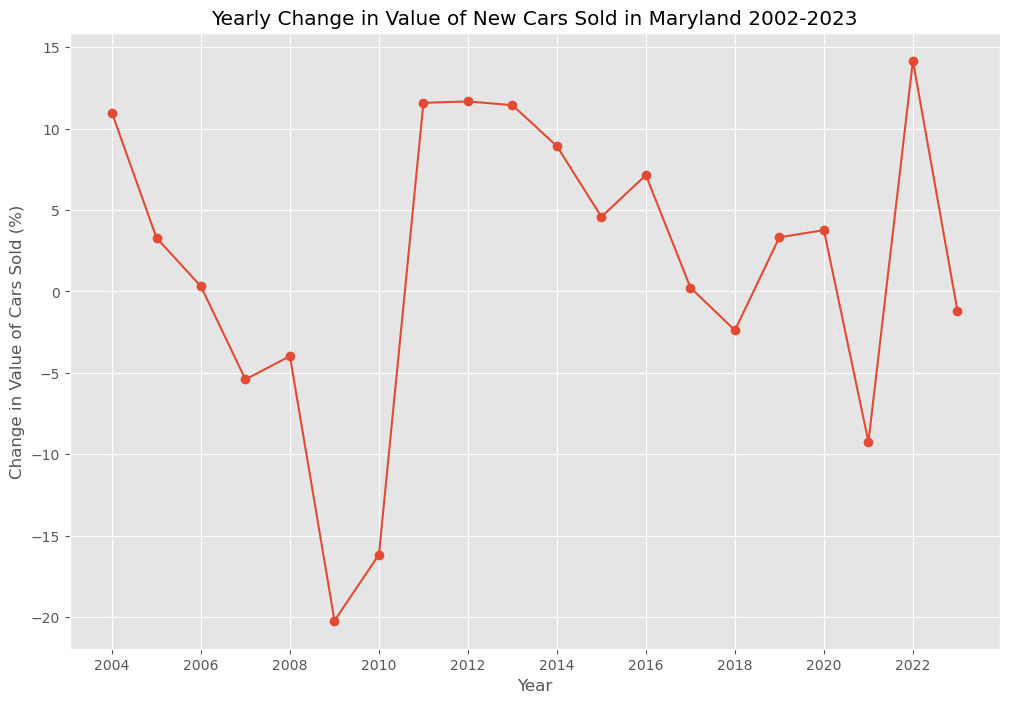

In [81]:
#Use the function to create time series line of the column Yearly Change in value of new cars sold 
yearly_change_value_new_cars_sold_pct_ts = time_series_lines(sales_data_new_cars_year.index,sales_data_new_cars_year['Yearly Change in Value of New Cars Sold (%)'], 'Yearly Change in Value of New Cars Sold in Maryland 2002-2023','Year', 'Change in Value of Cars Sold (%)','o')

#### 1.2.4.4 List highest & lowest selling change in value of new cars sold per year

In [82]:
#Create a list of the highest and lowest selling value of new cars sold per year
print_top_and_bottom_n(sales_data_new_cars_year['Yearly Change in Value of New Cars Sold (%)'],5,'Highest change in value of new cars sold:', 'Lowest change in value of new cars sold:', False,True)

Highest change in value of new cars sold:
1. 2021 - 14.17%
2. 2011 - 11.67%
3. 2010 - 11.59%
4. 2012 - 11.44%
5. 2003 - 10.98%

Lowest change in value of new cars sold:
1. 2008 - -20.23%
2. 2009 - -16.16%
3. 2020 - -9.24%
4. 2006 - -5.41%
5. 2007 - -3.97%


#### 1.2.4.5 Analyse the overall trends change in value of new cars sold

## 1.3 Used Cars Sold in Maryland

In [83]:
#Lets observe the used cars sold in Maryland from the original dataset
sales_data_month

,New Cars Sold,Used Cars Sold,Value of New Cars Sold,Value of Used Cars Sold,Cars Sold,Monthly Change in Cars Sold,Monthly Change in Cars Sold (%),Total Value of Cars Sold,Monthly Change in Value of Cars Sold,Monthly Change in Value of Cars Sold (%)
Date,,,,,,,,,,
2002-02-01,31106,49927,755015820,386481929,81033,NaN,NaN,1141497749,NaN,NaN
2002-03-01,27520,50982,664454223,361353242,78502,-2531.0,-3.123419,1025807465,-115690284.0,-10.134955
2002-04-01,34225,58794,805666244,419385387,93019,14517.0,18.492522,1225051631,199244166.0,19.423154
2002-05-01,36452,59817,846368297,433061150,96269,3250.0,3.493910,1279429447,54377816.0,4.438818
2002-06-01,37359,60577,855005784,442569410,97936,1667.0,1.731606,1297575194,18145747.0,1.418269
...,...,...,...,...,...,...,...,...,...,...
2023-07-01,27001,50613,1214340987,814275863,77614,-2174.0,-2.724721,2028616850,-61480796.0,-2.941527
2023-08-01,26360,49502,1196918451,887723892,75862,-1752.0,-2.257325,2084642343,56025493.0,2.761758
2023-09-01,25876,52725,1222581892,908454060,78601,2739.0,3.610503,2131035952,46393609.0,2.225495


In [84]:
#It is time to create a new dataframe on top of original dataframe and the new cars dataframe that contains used cars sold data
#Create a list of the columns from the original dataset that is going to contain the relevant information of used cars
used_cars_column = ['Used Cars Sold', 'Value of Used Cars Sold']

In [85]:
#Create a new dataframe from the existing sales data month dataframe
sales_data_used_cars_month = sales_data_month[used_cars_column].copy()
#Reminder that the date such as 2002-02-01 is the total sales from each day within the month of January 2002
sales_data_used_cars_month

,Used Cars Sold,Value of Used Cars Sold
Date,,
2002-02-01,49927,386481929
2002-03-01,50982,361353242
2002-04-01,58794,419385387
2002-05-01,59817,433061150
2002-06-01,60577,442569410
...,...,...
2023-07-01,50613,814275863
2023-08-01,49502,887723892
2023-09-01,52725,908454060


In [86]:
#Do the same as the code above however perform it for the yearly sales data
sales_data_used_cars_year = sales_data_year[used_cars_column].copy()
#Show the data and a reminder that the year 2003-01-01 is the data from the months of 2002
sales_data_used_cars_year

,Used Cars Sold,Value of Used Cars Sold
Date,,
2003-01-01,656089,4940209772
2004-01-01,675358,5166071497
2005-01-01,699677,5385548947
2006-01-01,703835,5639803515
2007-01-01,696968,5865687318
2008-01-01,678549,5794213869
2009-01-01,617885,4896167840
2010-01-01,608889,4510040527
2011-01-01,626045,5054802303


### 1.3.1 Overall trends in Used Cars Sold
Goals:
1. Create a time series of monthly number of used cars sold
2. List highest & lowest selling months of used cars sold
3. Create a time series of yearly number of used cars sold
4. List highest & lowest selling years of used cars sold
5. Analyse the overall trends in used cars sold

#### 1.3.1.1 Create a time series of monthly number of used cars sold 

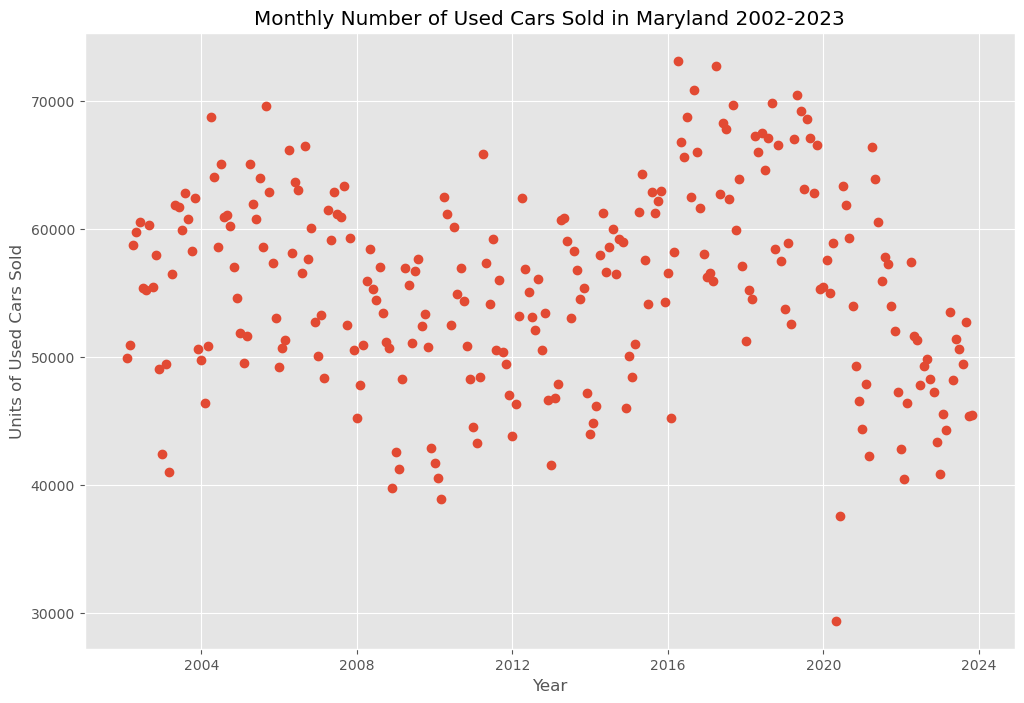

In [87]:
#Create a time series of column used cars sold in the new dataframe monthly number of used cars sold
monthly_used_cars_sold_ts = time_series(sales_data_used_cars_month.index,sales_data_used_cars_month['Used Cars Sold'],'Monthly Number of Used Cars Sold in Maryland 2002-2023', 'Year','Units of Used Cars Sold')

#### 1.3.1.2 List highest & lowest selling months used cars sold

In [88]:
#Create a list of the highest and the lowest selling months of used cars sold
print_top_and_bottom_n(sales_data_used_cars_month['Used Cars Sold'], 5, 'Highest value of used cars sold:', 'Lowest value of used cars sold:', 'True')

Highest value of used cars sold:
1. April 2016 - 73,163.00
2. April 2017 - 72,717.00
3. September 2016 - 70,887.00
4. May 2019 - 70,469.00
5. September 2018 - 69,867.00

Lowest value of used cars sold:
1. May 2020 - 29,420.00
2. June 2020 - 37,572.00
3. March 2010 - 38,932.00
4. December 2008 - 39,803.00
5. February 2022 - 40,497.00


#### 1.3.1.3 Create a time series of yearly number of used cars sold

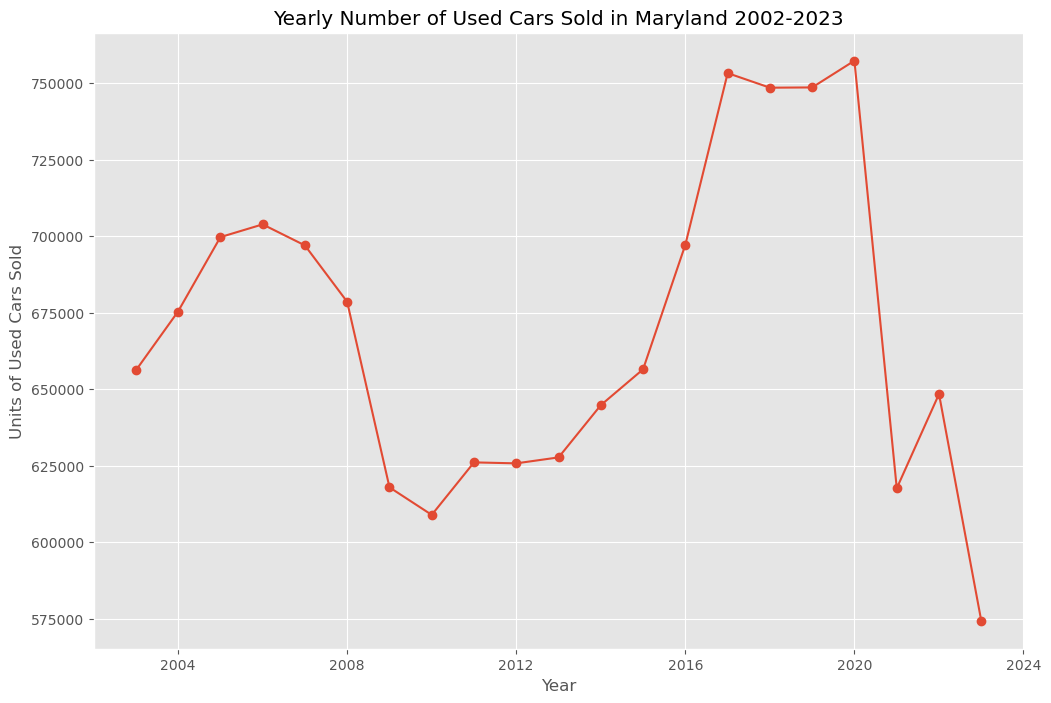

In [89]:
#Create a time series from the yearly number of used cars sold 
yearly_number_used_cars_sold = time_series_lines(sales_data_used_cars_year.index,sales_data_used_cars_year['Used Cars Sold'], 'Yearly Number of Used Cars Sold in Maryland 2002-2023','Year', 'Units of Used Cars Sold','o')

#### 1.3.1.4 List highest and lowest selling years of used cars sold

In [90]:
#Create a list of the highest and lowest selling years of used cars sold
print_top_and_bottom_n(sales_data_used_cars_year['Used Cars Sold'],5,'Highest number of used cars sold per year', 'Lowest number of used cars sold per year',False)

Highest number of used cars sold per year
1. 2019 - 757,326.00
2. 2016 - 753,271.00
3. 2018 - 748,596.00
4. 2017 - 748,511.00
5. 2005 - 703,835.00

Lowest number of used cars sold per year
1. 2022 - 574,294.00
2. 2009 - 608,889.00
3. 2020 - 617,580.00
4. 2008 - 617,885.00
5. 2011 - 625,728.00


#### 1.3.1.5 Analyse the overall trends in used cars sold

### 1.3.2 Explore Growth of Number of Used Cars Sold
Goals:
1. Create a time series of monthly change in the number of used cars sold
2. List highest & lowest selling change in used cars sold per month
3. Create a time series of yearly change in the number of used cars sold
4. List highest & lowest selling change in used cars sold per year
5. Analyse the overall trends in used cars sold

#### 1.3.2.1 Create a time series of monthly change in the number of used cars sold

In [91]:
#Let's look at the change in number of cars sold from month to month
#Create a new column called Monthly Change in number of used cars sold
sales_data_used_cars_month['Monthly Change in Number of Used Cars Sold'] = sales_data_used_cars_month['Used Cars Sold'].diff()
#Do the same as above but create a percentage difference from one month to the next month 
sales_data_used_cars_month['Monthly Change in Number of Used Cars Sold (%)'] = (sales_data_used_cars_month['Used Cars Sold'].pct_change())*100
sales_data_used_cars_month

,Used Cars Sold,Value of Used Cars Sold,Monthly Change in Number of Used Cars Sold,Monthly Change in Number of Used Cars Sold (%)
Date,,,,
2002-02-01,49927,386481929,NaN,NaN
2002-03-01,50982,361353242,1055.0,2.113085
2002-04-01,58794,419385387,7812.0,15.323055
2002-05-01,59817,433061150,1023.0,1.739973
2002-06-01,60577,442569410,760.0,1.270542
...,...,...,...,...
2023-07-01,50613,814275863,-803.0,-1.561771
2023-08-01,49502,887723892,-1111.0,-2.195088
2023-09-01,52725,908454060,3223.0,6.510848


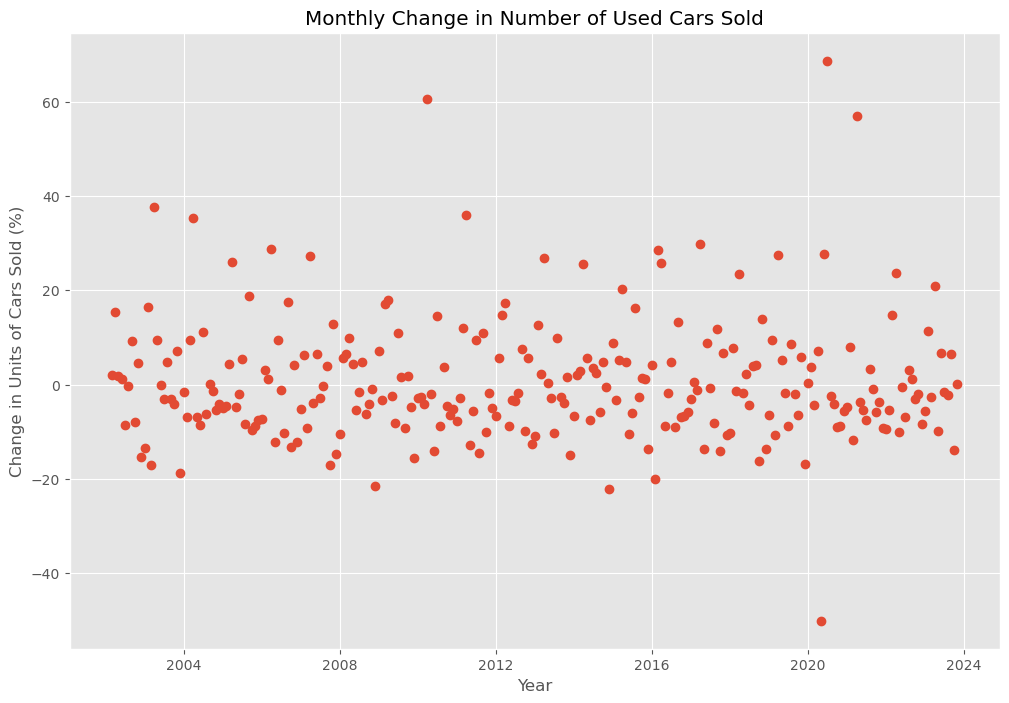

In [92]:
#Create a time series of the Monthly Change in number of used cars sold
time_series(sales_data_used_cars_month.index,sales_data_used_cars_month['Monthly Change in Number of Used Cars Sold (%)'],'Monthly Change in Number of Used Cars Sold', 'Year', 'Change in Units of Cars Sold (%)')

#### 1.3.2.2 List highest & lowest selling change in used cars sold per month

In [93]:
#List the highest and lowest change in number of new cars sold
print_top_and_bottom_n(sales_data_used_cars_month['Monthly Change in Number of Used Cars Sold (%)'],5,'Highest change in number of new cars sold:','Lowest change in number of new cars sold:',True,True)

Highest change in number of new cars sold:
1. July 2020 - 68.73%
2. April 2010 - 60.56%
3. April 2021 - 56.98%
4. April 2003 - 37.68%
5. April 2011 - 35.89%

Lowest change in number of new cars sold:
1. May 2020 - -50.10%
2. December 2014 - -22.05%
3. December 2008 - -21.53%
4. February 2016 - -19.98%
5. December 2003 - -18.84%


#### 1.3.2.3 Create a time series of yearly change in the number of used cars sold

In [94]:
#Let's look at the change in number of cars sold from year to year
#Create a new column called Monthly Change in number of used cars sold
sales_data_used_cars_year['Yearly Change in Number of Used Cars Sold'] = sales_data_used_cars_year['Used Cars Sold'].diff()
#Do the same as above but create a percentage difference from one year to the next
sales_data_used_cars_year['Yearly Change in Number of Used Cars Sold (%)'] = (sales_data_used_cars_year['Used Cars Sold'].pct_change())*100
sales_data_used_cars_year

,Used Cars Sold,Value of Used Cars Sold,Yearly Change in Number of Used Cars Sold,Yearly Change in Number of Used Cars Sold (%)
Date,,,,
2003-01-01,656089,4940209772,NaN,NaN
2004-01-01,675358,5166071497,19269.0,2.936949
2005-01-01,699677,5385548947,24319.0,3.600905
2006-01-01,703835,5639803515,4158.0,0.594274
2007-01-01,696968,5865687318,-6867.0,-0.975655
2008-01-01,678549,5794213869,-18419.0,-2.642733
2009-01-01,617885,4896167840,-60664.0,-8.940253
2010-01-01,608889,4510040527,-8996.0,-1.455934
2011-01-01,626045,5054802303,17156.0,2.817591


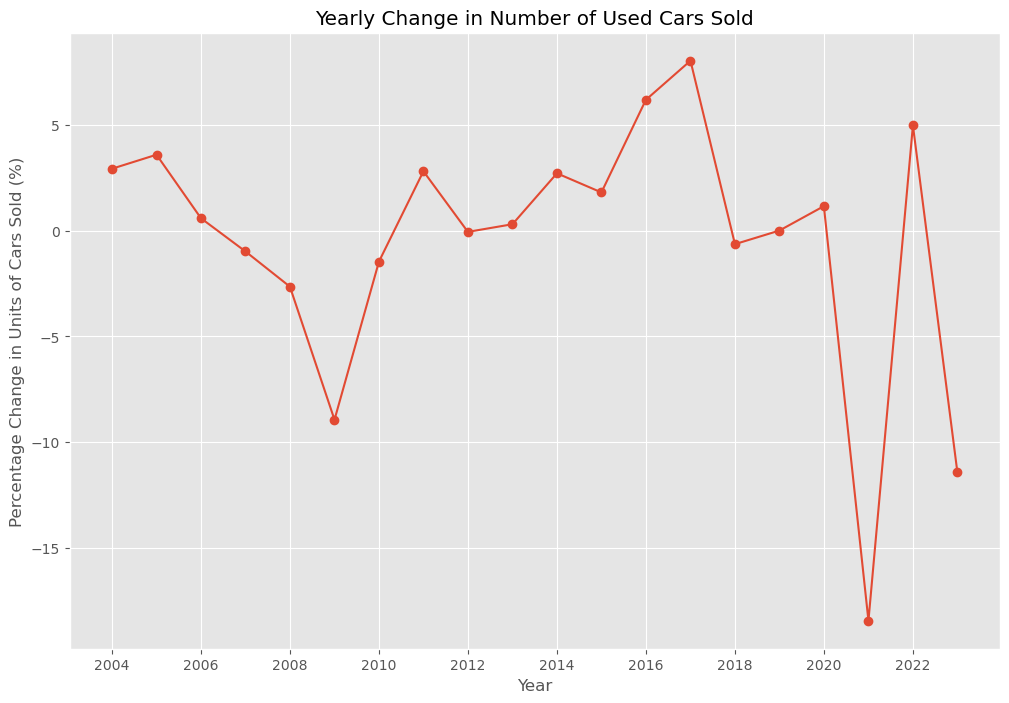

In [95]:
#Create a time series of the change in yearly number of used cars sold
time_series_lines(sales_data_used_cars_year.index,sales_data_used_cars_year['Yearly Change in Number of Used Cars Sold (%)'], 'Yearly Change in Number of Used Cars Sold','Year','Percentage Change in Units of Cars Sold (%)','o')

#### 1.3.2.4 List highest & lowest selling change in used cars sold per year

In [96]:
#List the highest and lowest change in number of cars sold
print_top_and_bottom_n(sales_data_used_cars_year['Yearly Change in Number of Used Cars Sold (%)'],5,'Highest change in number of used cars sold:','Lowest change in number of used cars sold:',False,True)

Highest change in number of used cars sold:
1. 2016 - 8.05%
2. 2015 - 6.20%
3. 2021 - 4.99%
4. 2004 - 3.60%
5. 2003 - 2.94%

Lowest change in number of used cars sold:
1. 2020 - -18.45%
2. 2022 - -11.43%
3. 2008 - -8.94%
4. 2007 - -2.64%
5. 2009 - -1.46%


#### 1.3.2.5 Analyse the overall trends in used cars sold

### 1.3.3 Identify Overall Trends in Value of Used Cars Sold
Goals:
1. Create a time series of monthly value of used cars sold
2. List highest & lowest values of used cars sold per month
3. Create a time series of yearly value of used cars sold
4. List highest & lowest values of used cars sold per year
5. Analyse the overall trends in value of used cars sold

#### 1.3.3.1 Create a time series of monthly value of used cars sold

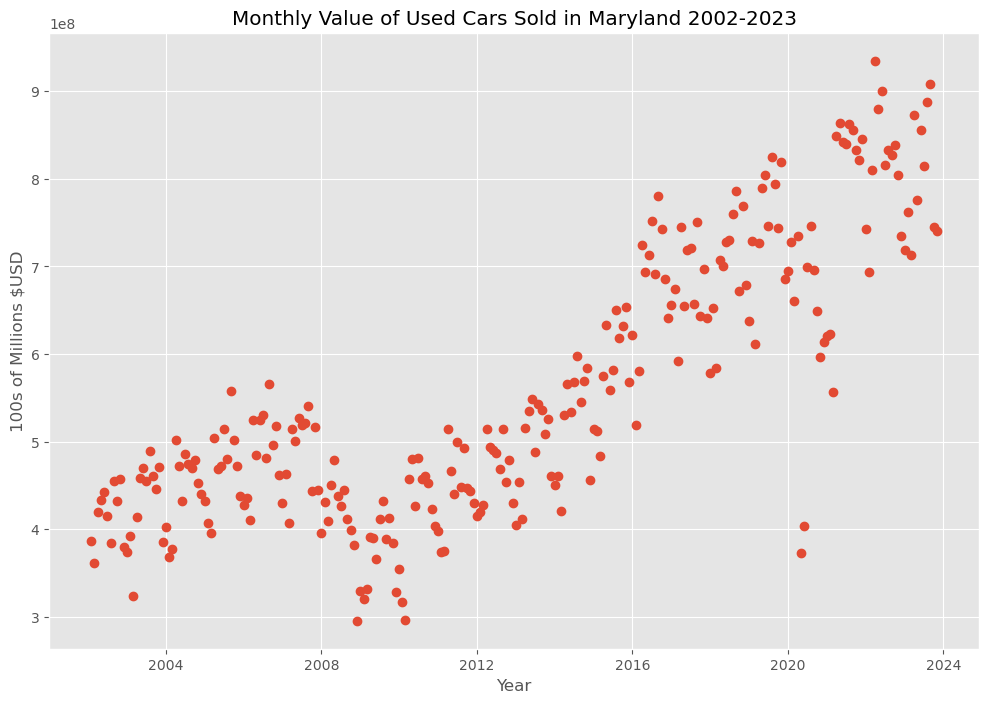

In [97]:
#Use the time series function to create a comparison of the monthly value of used cars sold and years
monthly_value_used_cars_sold =  time_series(sales_data_used_cars_month.index,sales_data_used_cars_month['Value of Used Cars Sold'],'Monthly Value of Used Cars Sold in Maryland 2002-2023','Year','100s of Millions $USD')

#### 1.3.3.2 List highest & lowest values of used cars sold per month

In [98]:
#List the highest and lowest values of used cars sold per month using the function 
print_top_and_bottom_n(sales_data_used_cars_month['Value of Used Cars Sold'],5,'Highest value of used cars sold per year:', 'Lowest value of used cars sold per year:', True,False)

Highest value of used cars sold per year:
1. April 2022 - 934,785,809.00
2. September 2023 - 908,454,060.00
3. June 2022 - 899,660,891.00
4. August 2023 - 887,723,892.00
5. May 2022 - 879,511,928.00

Lowest value of used cars sold per year:
1. December 2008 - 295,521,964.00
2. March 2010 - 296,703,782.00
3. February 2010 - 316,999,705.00
4. February 2009 - 320,520,578.00
5. March 2003 - 323,297,077.00


#### 1.3.3.3 Create a time series of yearly value of used cars sold

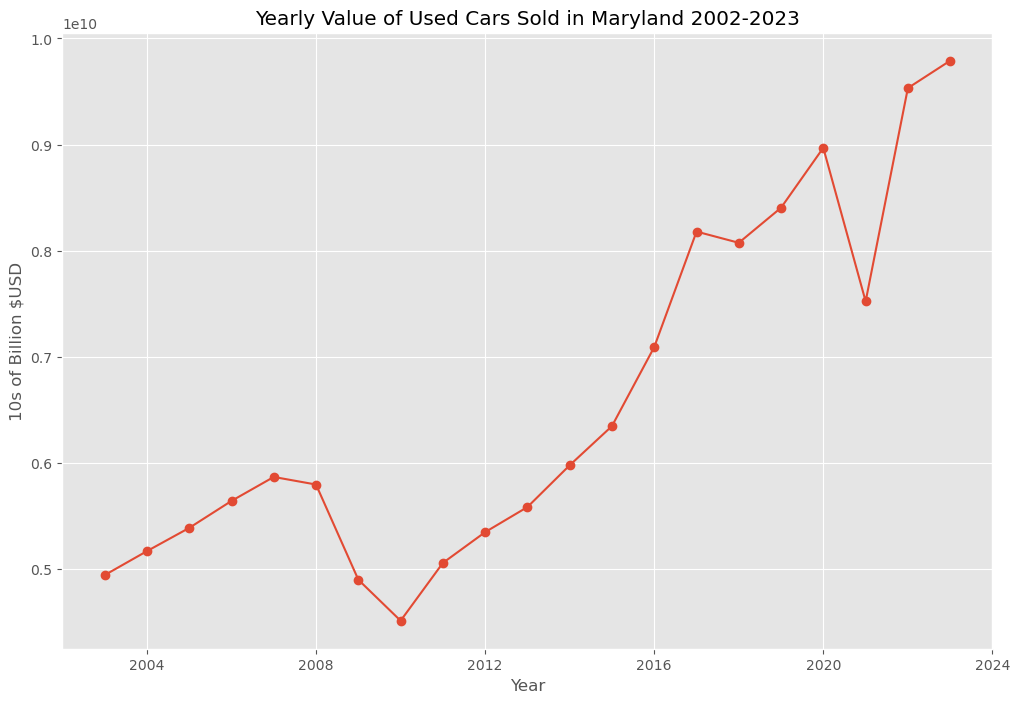

In [99]:
#Create a time series with a line from sales data used year with the column, value of used cars sold and years
yearly_value_used_cars_sold_ts = time_series_lines(sales_data_used_cars_year.index,sales_data_used_cars_year['Value of Used Cars Sold'],'Yearly Value of Used Cars Sold in Maryland 2002-2023','Year','10s of Billion $USD','o')

#### 1.3.3.4 List highest & lowest values of used cars sold per month

In [100]:
#List the highest and lowest values of used cars sold per month
print_top_and_bottom_n(sales_data_used_cars_year['Value of Used Cars Sold'],5,'Highest value of used cars sold:','Lowest value of used cars sold:')

Highest value of used cars sold:
1. 2022 - 9,790,439,348.00
2. 2021 - 9,532,585,736.00
3. 2019 - 8,969,294,701.00
4. 2018 - 8,404,165,810.00
5. 2016 - 8,179,372,358.00

Lowest value of used cars sold:
1. 2009 - 4,510,040,527.00
2. 2008 - 4,896,167,840.00
3. 2002 - 4,940,209,772.00
4. 2010 - 5,054,802,303.00
5. 2003 - 5,166,071,497.00


### 1.3.4 Explore Growth in Value of Used Cars Sold
Goals:
1. Create a time series of monthly change in the value of used cars sold
2. List highest & lowest change in value of used cars sold per month
3. Create a time series of yearly change in the value of used cars sold
4. List highest & lowest change in value used cars sold per year
5. Analyse the overall trends in value of used cars sold

#### 1.3.4.1 Create a time series of monthly change in the number of used cars sold

In [101]:
#Let's look at the change in value of cars sold from month to month
#Create a new column called Monthly Change in value of used cars sold
sales_data_used_cars_month['Monthly Change in Value of Used Cars Sold'] = sales_data_used_cars_month['Value of Used Cars Sold'].diff()
#Do the same as above but create a percentage difference from one month to the next month 
sales_data_used_cars_month['Monthly Change in Value of Used Cars Sold (%)'] = (sales_data_used_cars_month['Value of Used Cars Sold'].pct_change())*100
sales_data_used_cars_month

,Used Cars Sold,Value of Used Cars Sold,Monthly Change in Number of Used Cars Sold,Monthly Change in Number of Used Cars Sold (%),Monthly Change in Value of Used Cars Sold,Monthly Change in Value of Used Cars Sold (%)
Date,,,,,,
2002-02-01,49927,386481929,NaN,NaN,NaN,NaN
2002-03-01,50982,361353242,1055.0,2.113085,-25128687.0,-6.501905
2002-04-01,58794,419385387,7812.0,15.323055,58032145.0,16.059672
2002-05-01,59817,433061150,1023.0,1.739973,13675763.0,3.260906
2002-06-01,60577,442569410,760.0,1.270542,9508260.0,2.195593
...,...,...,...,...,...,...
2023-07-01,50613,814275863,-803.0,-1.561771,-41239508.0,-4.820429
2023-08-01,49502,887723892,-1111.0,-2.195088,73448029.0,9.020043
2023-09-01,52725,908454060,3223.0,6.510848,20730168.0,2.335204


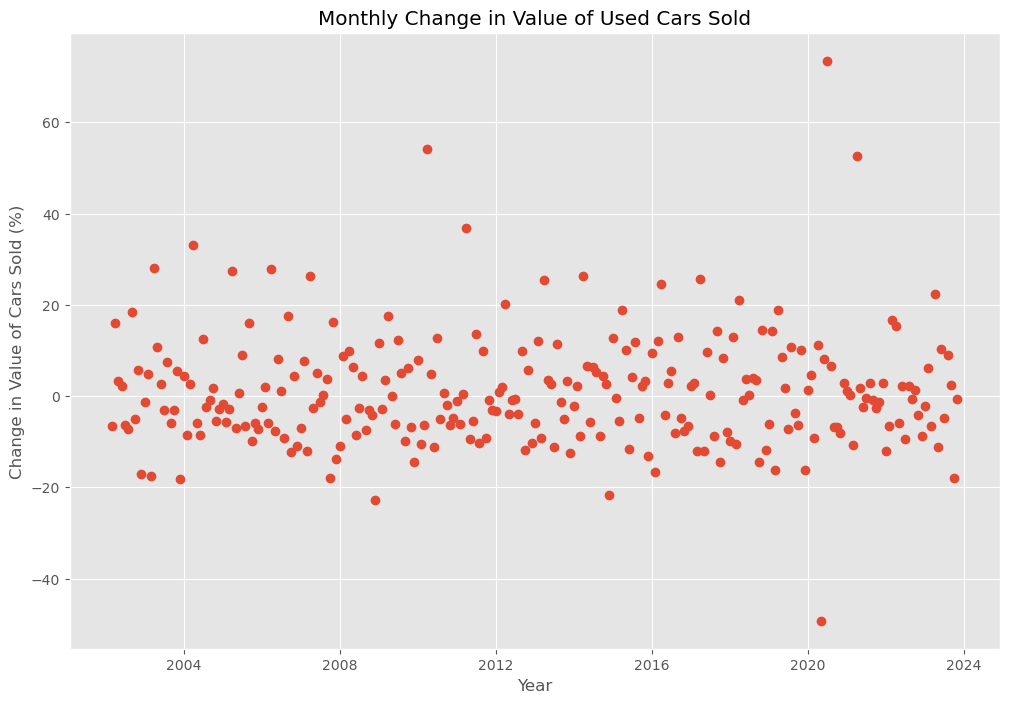

In [102]:
#Create a time series of the Monthly Change in value of used cars sold
monthly_change_value_used_cars_sold_pct_ts = time_series(sales_data_used_cars_month.index,sales_data_used_cars_month['Monthly Change in Value of Used Cars Sold (%)'],'Monthly Change in Value of Used Cars Sold', 'Year', 'Change in Value of Cars Sold (%)')

#### 1.3.4.2 List highest & lowest selling change in used cars sold per month

In [103]:
#List the highest and lowest change in value of new cars sold
print_top_and_bottom_n(sales_data_used_cars_month['Monthly Change in Value of Used Cars Sold (%)'],5,'Highest change in value of new cars sold:','Lowest change in value of new cars sold:',True,True)

Highest change in value of new cars sold:
1. July 2020 - 73.48%
2. April 2010 - 54.16%
3. April 2021 - 52.55%
4. April 2011 - 36.82%
5. April 2004 - 33.02%

Lowest change in value of new cars sold:
1. May 2020 - -49.24%
2. December 2008 - -22.73%
3. December 2014 - -21.79%
4. December 2003 - -18.14%
5. October 2023 - -18.03%


#### 1.3.4.3 Create a time series of yearly change in the number of used cars sold

In [104]:
#Let's look at the change in value of cars sold from year to year
#Create a new column called Monthly Change in number of used cars sold
sales_data_used_cars_year['Yearly Change in Value of Used Cars Sold'] = sales_data_used_cars_year['Used Cars Sold'].diff()
#Do the same as above but create a percentage difference from one year to the next
sales_data_used_cars_year['Yearly Change in Value of Used Cars Sold (%)'] = (sales_data_used_cars_year['Used Cars Sold'].pct_change())*100
sales_data_used_cars_year

,Used Cars Sold,Value of Used Cars Sold,Yearly Change in Number of Used Cars Sold,Yearly Change in Number of Used Cars Sold (%),Yearly Change in Value of Used Cars Sold,Yearly Change in Value of Used Cars Sold (%)
Date,,,,,,
2003-01-01,656089,4940209772,NaN,NaN,NaN,NaN
2004-01-01,675358,5166071497,19269.0,2.936949,19269.0,2.936949
2005-01-01,699677,5385548947,24319.0,3.600905,24319.0,3.600905
2006-01-01,703835,5639803515,4158.0,0.594274,4158.0,0.594274
2007-01-01,696968,5865687318,-6867.0,-0.975655,-6867.0,-0.975655
2008-01-01,678549,5794213869,-18419.0,-2.642733,-18419.0,-2.642733
2009-01-01,617885,4896167840,-60664.0,-8.940253,-60664.0,-8.940253
2010-01-01,608889,4510040527,-8996.0,-1.455934,-8996.0,-1.455934
2011-01-01,626045,5054802303,17156.0,2.817591,17156.0,2.817591


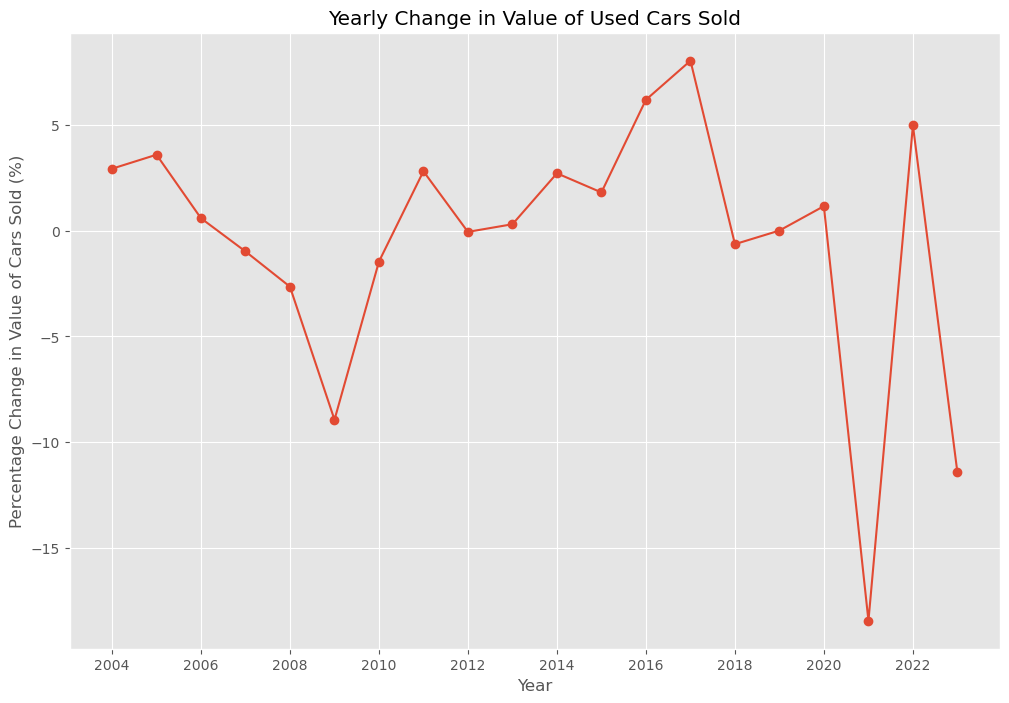

In [105]:
#Create a time series of the change in yearly value of used cars sold
yearly_change_value_used_cars_sold_pct_ts = time_series_lines(sales_data_used_cars_year.index,sales_data_used_cars_year['Yearly Change in Value of Used Cars Sold (%)'], 'Yearly Change in Value of Used Cars Sold','Year','Percentage Change in Value of Cars Sold (%)','o')

#### 1.3.4.4 List highest & lowest selling change in used cars sold per year

In [106]:
#List the highest and lowest change in value of cars sold
print_top_and_bottom_n(sales_data_used_cars_year['Yearly Change in Value of Used Cars Sold (%)'],5,'Highest change in value of used cars sold:','Lowest change in value of used cars sold:',False,True)

Highest change in value of used cars sold:
1. 2016 - 8.05%
2. 2015 - 6.20%
3. 2021 - 4.99%
4. 2004 - 3.60%
5. 2003 - 2.94%

Lowest change in value of used cars sold:
1. 2020 - -18.45%
2. 2022 - -11.43%
3. 2008 - -8.94%
4. 2007 - -2.64%
5. 2009 - -1.46%


#### 1.3.2.5 Analyse the overall trends in used cars sold

#### Review of Chapter 1

In [107]:
#Make sure that the sales data month table and sales data year table have all of the data from new and used tables
#This is going to be so that we can export the data into R and do some statistical research
#Lets check the sales data month dataframe
sales_data_month

,New Cars Sold,Used Cars Sold,Value of New Cars Sold,Value of Used Cars Sold,Cars Sold,Monthly Change in Cars Sold,Monthly Change in Cars Sold (%),Total Value of Cars Sold,Monthly Change in Value of Cars Sold,Monthly Change in Value of Cars Sold (%)
Date,,,,,,,,,,
2002-02-01,31106,49927,755015820,386481929,81033,NaN,NaN,1141497749,NaN,NaN
2002-03-01,27520,50982,664454223,361353242,78502,-2531.0,-3.123419,1025807465,-115690284.0,-10.134955
2002-04-01,34225,58794,805666244,419385387,93019,14517.0,18.492522,1225051631,199244166.0,19.423154
2002-05-01,36452,59817,846368297,433061150,96269,3250.0,3.493910,1279429447,54377816.0,4.438818
2002-06-01,37359,60577,855005784,442569410,97936,1667.0,1.731606,1297575194,18145747.0,1.418269
...,...,...,...,...,...,...,...,...,...,...
2023-07-01,27001,50613,1214340987,814275863,77614,-2174.0,-2.724721,2028616850,-61480796.0,-2.941527
2023-08-01,26360,49502,1196918451,887723892,75862,-1752.0,-2.257325,2084642343,56025493.0,2.761758
2023-09-01,25876,52725,1222581892,908454060,78601,2739.0,3.610503,2131035952,46393609.0,2.225495


In [108]:
#Let's observe the sales data new month
sales_data_new_cars_month

,New Cars Sold,Value of New Cars Sold,Monthly Change in Number of New Cars Sold,Monthly Change in Number of New Cars Sold (%),Monthly Change in Value of New Cars Sold,Monthly Change in Value of New Cars Sold (%)
Date,,,,,,
2002-02-01,31106,755015820,NaN,NaN,NaN,NaN
2002-03-01,27520,664454223,-3586.0,-11.528323,-90561597.0,-11.994662
2002-04-01,34225,805666244,6705.0,24.364099,141212021.0,21.252333
2002-05-01,36452,846368297,2227.0,6.506939,40702053.0,5.051974
2002-06-01,37359,855005784,907.0,2.488204,8637487.0,1.020535
...,...,...,...,...,...,...
2023-07-01,27001,1214340987,-1371.0,-4.832229,-20241288.0,-1.639525
2023-08-01,26360,1196918451,-641.0,-2.373986,-17422536.0,-1.434732
2023-09-01,25876,1222581892,-484.0,-1.836115,25663441.0,2.144126


In [109]:
#Create a list of the columns that can be copied from the new cars month to cars sold month
columns_new_month = ['Monthly Change in Number of New Cars Sold', 'Monthly Change in Number of New Cars Sold (%)','Monthly Change in Value of New Cars Sold', 'Monthly Change in Value of New Cars Sold (%)']
#Now lets add these values to the original sales data month dataframe
sales_data_month[columns_new_month] = sales_data_new_cars_month[columns_new_month]
#Observe the new columns in the dataframe
#Perform the same process for sales data used month 
columns_used_month = ['Monthly Change in Number of Used Cars Sold', 'Monthly Change in Number of Used Cars Sold (%)','Monthly Change in Value of Used Cars Sold', 'Monthly Change in Value of Used Cars Sold (%)']
sales_data_month[columns_used_month] = sales_data_used_cars_month[columns_used_month]
sales_data_month

,New Cars Sold,Used Cars Sold,Value of New Cars Sold,Value of Used Cars Sold,Cars Sold,Monthly Change in Cars Sold,Monthly Change in Cars Sold (%),Total Value of Cars Sold,Monthly Change in Value of Cars Sold,Monthly Change in Value of Cars Sold (%),Monthly Change in Number of New Cars Sold,Monthly Change in Number of New Cars Sold (%),Monthly Change in Value of New Cars Sold,Monthly Change in Value of New Cars Sold (%),Monthly Change in Number of Used Cars Sold,Monthly Change in Number of Used Cars Sold (%),Monthly Change in Value of Used Cars Sold,Monthly Change in Value of Used Cars Sold (%)
Date,,,,,,,,,,,,,,,,,,
2002-02-01,31106,49927,755015820,386481929,81033,NaN,NaN,1141497749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-01,27520,50982,664454223,361353242,78502,-2531.0,-3.123419,1025807465,-115690284.0,-10.134955,-3586.0,-11.528323,-90561597.0,-11.994662,1055.0,2.113085,-25128687.0,-6.501905
2002-04-01,34225,58794,805666244,419385387,93019,14517.0,18.492522,1225051631,199244166.0,19.423154,6705.0,24.364099,141212021.0,21.252333,7812.0,15.323055,58032145.0,16.059672
2002-05-01,36452,59817,846368297,433061150,96269,3250.0,3.493910,1279429447,54377816.0,4.438818,2227.0,6.506939,40702053.0,5.051974,1023.0,1.739973,13675763.0,3.260906
2002-06-01,37359,60577,855005784,442569410,97936,1667.0,1.731606,1297575194,18145747.0,1.418269,907.0,2.488204,8637487.0,1.020535,760.0,1.270542,9508260.0,2.195593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,27001,50613,1214340987,814275863,77614,-2174.0,-2.724721,2028616850,-61480796.0,-2.941527,-1371.0,-4.832229,-20241288.0,-1.639525,-803.0,-1.561771,-41239508.0,-4.820429
2023-08-01,26360,49502,1196918451,887723892,75862,-1752.0,-2.257325,2084642343,56025493.0,2.761758,-641.0,-2.373986,-17422536.0,-1.434732,-1111.0,-2.195088,73448029.0,9.020043
2023-09-01,25876,52725,1222581892,908454060,78601,2739.0,3.610503,2131035952,46393609.0,2.225495,-484.0,-1.836115,25663441.0,2.144126,3223.0,6.510848,20730168.0,2.335204


In [110]:
#Perform the same process but for the years data
columns_new_year = ['Yearly Change in Number of New Cars Sold', 'Yearly Change in Number of New Cars Sold (%)','Yearly Change in Value of New Cars Sold', 'Yearly Change in Value of New Cars Sold (%)']
sales_data_year[columns_new_year] = sales_data_new_cars_year[columns_new_year]
#And again sales data used year
columns_used_year = ['Yearly Change in Number of Used Cars Sold', 'Yearly Change in Number of Used Cars Sold (%)','Yearly Change in Value of Used Cars Sold', 'Yearly Change in Value of Used Cars Sold (%)']
sales_data_year[columns_new_year] = sales_data_new_cars_year[columns_new_year]
sales_data_year

,New Cars Sold,Used Cars Sold,Value of New Cars Sold,Value of Used Cars Sold,Cars Sold,Yearly Change in Cars Sold,Yearly Change in Cars Sold (%),Total Value of Cars Sold,Yearly Change in Value of Cars Sold,Yearly Change in Value of Cars Sold (%),Yearly Change in Number of New Cars Sold,Yearly Change in Number of New Cars Sold (%),Yearly Change in Value of New Cars Sold,Yearly Change in Value of New Cars Sold (%)
Date,,,,,,,,,,,,,,
2003-01-01,402164,656089,9572554876,4940209772,1058253,NaN,NaN,14512764648,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01,428252,675358,10623148339,5166071497,1103610,45357.0,4.286026,15789219836,1.276455e+09,8.795396,26088.0,6.486906,1.050593e+09,10.975058
2005-01-01,428508,699677,10972956024,5385548947,1128185,24575.0,2.226783,16358504971,5.692851e+08,3.605530,256.0,0.059778,3.498077e+08,3.292881
2006-01-01,421834,703835,11006733922,5639803515,1125669,-2516.0,-0.223013,16646537437,2.880325e+08,1.760751,-6674.0,-1.557497,3.377790e+07,0.307829
2007-01-01,399282,696968,10411657206,5865687318,1096250,-29419.0,-2.613468,16277344524,-3.691929e+08,-2.217836,-22552.0,-5.346179,-5.950767e+08,-5.406479
2008-01-01,378184,678549,9997917483,5794213869,1056733,-39517.0,-3.604743,15792131352,-4.852132e+08,-2.980911,-21098.0,-5.283985,-4.137397e+08,-3.973812
2009-01-01,309159,617885,7975401987,4896167840,927044,-129689.0,-12.272637,12871569827,-2.920562e+09,-18.493777,-69025.0,-18.251698,-2.022515e+09,-20.229368
2010-01-01,248928,608889,6686217914,4510040527,857817,-69227.0,-7.467499,11196258441,-1.675311e+09,-13.015595,-60231.0,-19.482208,-1.289184e+09,-16.164503
2011-01-01,268022,626045,7460915522,5054802303,894067,36250.0,4.225843,12515717825,1.319459e+09,11.784824,19094.0,7.670491,7.746976e+08,11.586485


In [111]:
sales_data_new_cars_year

,New Cars Sold,Value of New Cars Sold,Yearly Change in Number of New Cars Sold,Yearly Change in Number of New Cars Sold (%),Yearly Change in Value of New Cars Sold,Yearly Change in Value of New Cars Sold (%)
Date,,,,,,
2003-01-01,402164,9572554876,NaN,NaN,NaN,NaN
2004-01-01,428252,10623148339,26088.0,6.486906,1.050593e+09,10.975058
2005-01-01,428508,10972956024,256.0,0.059778,3.498077e+08,3.292881
2006-01-01,421834,11006733922,-6674.0,-1.557497,3.377790e+07,0.307829
2007-01-01,399282,10411657206,-22552.0,-5.346179,-5.950767e+08,-5.406479
2008-01-01,378184,9997917483,-21098.0,-5.283985,-4.137397e+08,-3.973812
2009-01-01,309159,7975401987,-69025.0,-18.251698,-2.022515e+09,-20.229368
2010-01-01,248928,6686217914,-60231.0,-19.482208,-1.289184e+09,-16.164503
2011-01-01,268022,7460915522,19094.0,7.670491,7.746976e+08,11.586485


In [112]:
#Export both of these dataframes as csv files
#Export the sales data month
sales_data_month.to_csv('sales_data_month.csv',index=True)
#Export the sales data year
sales_data_year.to_csv('sales_data_year.csv',index=True)

# 2. Key Economic Factors Impacting Cars Sold in Maryland

## 2.1 Inflation Rate

### 2.1.1 Contrast change in price of cars with Inflation Rate (CPI)

#### 2.1.1.1 Total price

#### 2.1.1.2 New price

#### 2.1.1.3 Used Price

## 2.2 Disposable Income

## 2.3 Wage Growth

## 2.4 Recovery of Automotive Industry

# 3. Regression Analysis

# 4. Forecasting Future Sales